# Data mining for HeartBit dataset
---
### Steps
1. Exploratory Data Analysis
    1.1. Understanding the problem
    1.2. Getting to know the data
    1.3. Prepare the data for training (training intermediate model)
2. Training and improving the model and evaluating the model

## 1. Exploratory Data Analysis
### 1.1. Understanding the problem
The goal of this project is to predict the NYHA class of a patient based on the patient's data. The NYHA (New York Heart Association) class is the functional classification system for the patient with heart failure in stage C or D. The classification is related to the patient symptoms and physical activity.

The NYHA class is divided into four classes:
- Class I: No limitation of physical activity. Ordinary physical activity does not cause undue fatigue, palpitation or shortness of breath.
- Class II: Slight limitation of physical activity. Comfortable at rest. Ordinary physical activity results in fatigue, palpitation or shortness of breath.
- Class III: Marked limitation of physical activity. Comfortable at rest. Less than ordinary activity causes fatigue, palpitation or shortness of breath.
- Class IV: Unable to carry out any physical activity without discomfort. Symptoms of heart failure at rest. If any physical activity is undertaken, discomfort is increased.

### 1.2. Getting to know the data
For this project, I will be using the HeartBit dataset. The dataset contains values of 63 variables recorded for 469 patients.
The variables can be grouped into following groups:
- Clinical
- Technical
- Demographic
- Anthropometry (pomiary antropometryczne - np. wzrost, waga)
- Comorbidities (choroby współistniejące)
- Treatment
- Biochemistry
- Fitness Level

#### The variables

| Additional variable number | Variable name | Variable description                                                                                                          | Character of data | Category of variable |
|---------------------------|---------------|------------------------------------------------------------------------------------------------------------------------------|--------------------|----------------------|
| VAR1                      | DEATH?        | information if the patient is death (1) or alive (0)                                                                         | binary             | Clinical             |
| VAR2                      | DEATHDATE     | date of death (if death=1) or date of the confirmation that the patient is still alive                                       | date               | Technical            |
| VAR3                      | TIMEFU        | number of days between examination and date death or date of the confirmation that the patient is still alive               | number             | Technical            |
| VAR4                      | QOL           | result of the survey measuring the quality of life (QoL, total score range 0–105, from best to worst)                       | number             | Clinical             |
| VAR5                      | OQLsub1       | scores for a QoL subscale - physical dimension (8 items, range 0–40 from best to worst)                                      | number             | Clinical             |
| VAR6                      | OQLsub2       | scores for a QoL subscale - emotional dimension (5 items, range 0–25 from best to worst)                                     | number             | Clinical             |
| VAR7                      | DOB           | date of birth                                                                                                                | date               | Technical            |
| VAR8                      | DOE           | date of the examination                                                                                                      | date               | Technical            |
| VAR9                      | AGE           | age at examination                                                                                                           | number             | Demographic          |
| VAR10                     | HEIGHT.CM     | body height in cm                                                                                                            | number             | Anthropometry        |
| VAR11                     | WEIGHT.KG     | body mass in kg                                                                                                              | number             | Anthropometry        |
| VAR12                     | BMI           | body mass index (mass per squared height); <18.5=underweight range, 18.5 to <25=normal, 25-<30=overweight, 30.0 or higher=obese | number             | Anthropometry        |
| VAR13                     | LVEF.0        | left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping                | number             | Clinical             |
| VAR14                     | NYHA          | NYHA Classification - The Stages of Heart Failure                                                                            | category           | Clinical             |
| VAR15                     | PM            | information about artificial pacemaker (0=no pacemaker)                                                                      | binary             | Clinical             |
| VAR16                     | AETH.HF       | information about the clinical cause of heart failure (1=ischemic disease or 2=other)                                         | binary             | Clinical             |
| VAR17                     | MI            | information about previous myocardial infarction (1=yes)                                                                      | binary             | Comorbidities        |
| VAR18                     | AF            | information about atrial fibrillation (1=yes)                                                                                 | binary             | Comorbidities        |
| VAR19                     | DM            | information about diabetes (1=yes)                                                                                            | binary             | Comorbidities        |
| VAR20                     | HT            | information about hypertension (1=yes)                                                                                        | binary             | Comorbidities        |
| VAR21                     | COPD          | information about lung disease (1=yes)                                                                                        | binary             | Comorbidities        |
| VAR22                     | STROKE        | information about previous stroke (1=yes)                                                                                     | binary             | Comorbidities        |
| VAR23                     | KIDNEY.DIS    | information about kidney disease (1=yes)                                                                                      | binary             | Comorbidities        |
| VAR24                     | ACEI.ARB      | information about treatment using ace-inhibitors or ARB (similar drugs, 1=yes)                                                | binary             | Treatment            |
| VAR25                     | BB            | information about treatment using beta blockers (1=yes)                                                                       | binary             | Treatment            |
| VAR26                     | MRA           | information about treatment using aldosterone antagonists (1=yes)                                                             | binary             | Treatment            |
| VAR27                     | DIUR          | information about treatment using oral diuretics (1=yes)                                                                      | binary             | Treatment            |
| VAR28                     | ANTIPLAT      | information about treatment using antiplatelet drugs (1=yes)                                                                  | binary             | Treatment            |
| VAR29                     | STATIN        | information about treatment using statin (1=yes)                                                                              | binary             | Treatment            |
| VAR30                     | DIGOX         | information about treatment using digoxin (1=yes)                                                                             | binary             | Treatment            |
| VAR31                     | HB            | level of blood hemoglobin                                                                                                    | number             | Biochemistry          |
| VAR32                     | NA            | level of blood sodium                                                                                                        | number             | Biochemistry          |
| VAR33                     | K             | level of blood potassium                                                                                                     | number             | Biochemistry          |
| VAR34                     | BNP           | level of blood peptide: BNP (elevated level is characteristic for heart failure)                                              | number             | Biochemistry          |
| VAR35                     | CRP           | level of blood protein CRP (characteristic for inflammation)                                                                  | number             | Biochemistry          |
| VAR36                     | LVEDD         | parameter from heart ultrasound: left ventricular end diastolic diameter (increased in heart failure)                         | number             | Clinical             |
| VAR37                     | MR            | Mitral regurgitation (valvular heart disease), bigger number = worse                                                         | categories         | Clinical             |
| VAR38                     | REST.SBP      | systolic blood pressure at rest                                                                                              | number             | Clinical             |
| VAR39                     | REST.DBP      | diastolic blood pressure at rest                                                                                             | number             | Clinical             |
| VAR40                     | REST.HR       | heart rate at rest                                                                                                           | number             | Clinical             |
| VAR41                     | EXERCISE1     | EXERCISE 1: number of seconds needed to complete the task, higher number = worse)                                             | number             | Fitness level        |
| VAR42                     | EXERCISE2     | EXERCISE 2: number of repeated movements during the task (higher number = better result)                                      | number             | Fitness level        |
| VAR43                     | EXERCISE3     | EXERCISE 3: number of repeated movements during the task (higher number = better result)                                      | number             | Fitness level        |
| VAR44                     | 6MWT.DIST     | number of meters (distance) covered by the patient during the 6 minute walking test (bigger number = better)                  | number             | Fitness level        |
| VAR45                     | 6MWT.FATIGUE  | the level of fatigue assessed by the patient after the walking test (using a scale 0-10)                                      | number OR categories | Fitness level        |
| VAR46                     | 6MWT.DYSPN    | the level of shortness of breath during walking test assessed by the patient (using a scale 0-10)                             | number OR categories | Fitness level        |
| VAR47                     | 6MWT.SBP1     | systolic blood pressure before the walking test                                                                               | number             | Fitness level        |
| VAR48                     | 6MWT.DBP1     | diastolic blood pressure before the walking test                                                                              | number             | Fitness level        |
| VAR49                     | 6MWT.HR1      | heart rate before the walking test                                                                                            | number             | Fitness level        |
| VAR50                     | 6MWT.SBP2     | systolic blood pressure after the walking test                                                                                | number             | Fitness level        |
| VAR51                     | 6MWT.DBP2     | diastolic blood pressure after the walking test                                                                               | number             | Fitness level        |
| VAR52                     | 6MWT.HR2      | heart rate after the walking test                                                                                             | number             | Fitness level        |
| VAR53                     | EXERCISE4     | EXERCISE4: the patient is asked to touch his/her feet with the fingers of the palms. The number represents centimeters          | number             | Fitness level        |
| VAR54                     | EXERCISE5     | EXERCISE5: the patient is asked to touch left palm with the right one but it has to be done at his back. The number represents centimeters | number             | Fitness level        |
| VAR55                     | CPX.TIME      | time of exercise on a treadmill                                                                                              | number             | Fitness level        |
| VAR56                     | CPX.PEAKVO2   | peak oxygen consumption during exercise testing on a treadmill                                                               | number             | Fitness level        |
| VAR57                     | CPX.PEAKVO2FORBM | peak oxygen consumption during exercise testing on a treadmill per body mass                                                | number             | Fitness level        |
| VAR58                     | RER           | respiratory exchange ratio (index of metabolism during an exercise on a treadmill)                                          | number             | Fitness level        |
| VAR59                     | SLOPE         | slope between oxygen and carbon dioxide during exercise testing on a treadmill                                               | number             | Fitness level        |
| VAR60                     | METS          | number of metabolic equivalents (level of work performed by the patient during exercise using a treadmill)                    | number             | Fitness level        |
| VAR61                     | WEBER         | The Weber classification: stratification of patients based on peak VO2 and anaerobic threshold to define functional physical capacity. Higher class is worse | categories         | Fitness level        |
| VAR62                     | PEAK>18       | Dividing patients based on a cutoff value of peak oxygen consumption (used for Weber)                                         | binary             | Fitness level        |
| VAR63                     | SLOPE>35      | Dividing patients based on a cutoff value of slope (used for Weber)                                                          | binary             | Fitness level        |

---
NOTES:
- Sprawdzić dominujące wartości w kolumnach
- Zapoznanie się z działaniem drzewa decyzyjnego z wykorzystaniem biblioteki scikit-learn (https://scikit-learn.org/stable/modules/tree.html)
- Zamiana atrybutów nominalnych na numeryczne (https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Redukcja wielowymiarowości (https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
- Wyważanie klas ze względu na niezbalansowane dane, aby zapobiec tendencyjności modelu w kierunku klasy dominującej - ustawienie class_weight='balanced' (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- przycinanie drzewa decyzyjnego
- scikit-learn wykorzystuje zoptymalizowaną wersję algorytmu CART (Classification and Regression Trees) i nie obsługuje obecnie zmiennych kategorycznych

# 1.3. Prepare data for analysis
---

During the data preparation phase, we will perform the following steps:
- Load data
- Remove unnecessary columns
- Normalize NYHA target values to 0-4 range
- Divide attributes into groups
- Create the model for each group of attributes
- Analysis of each group of attributes to find the most important ones
---

In [119]:
import os

import matplotlib.pyplot as plt
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

In [120]:
# Load data variables names and additional variable numbers
data_headers = pd.read_excel("data/heartbit.xlsx", nrows=1)
# Drop unnecessary CODES column
data_headers = data_headers.drop(columns=['CODES'])
data_headers.head()
data_headers["VAR32"][0] = "NA"
data_headers.head()

C:\Users\Krystian\AppData\Local\Temp\ipykernel_19728\2532535120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_headers["VAR32"][0] = "NA"


VAR1       VAR2    VAR3 VAR4     VAR5     VAR6 VAR7 VAR8 VAR9      VAR10  \
0  DEATH?  DEATHDATE  TIMEFU  QOL  OQLsub1  OQLsub2  DOB  DOE  AGE  HEIGHT.CM   

   ...      VAR54     VAR55        VAR56             VAR57 VAR58  VAR59 VAR60  \
0  ...  EXERCISE5  CPX.TIME  CPX.PEAKVO2  CPX.PEAKVO2FORBM   RER  SLOPE  METS   

   VAR61    VAR62     VAR63  
0  WEBER  PEAK>18  SLOPE>35  

[1 rows x 63 columns]

In [121]:
# Load data
data = pd.read_excel("data/heartbit.xlsx", header=1)

# Print sorted missing values
print(data.isnull().sum().sort_values(ascending=False))
print(f"Count before drop: {data.shape[0]}")
# Print total missing values
print(f"Total missing values: {data.isnull().sum().sum()}")
# Remove unnecessary CODES column
data = data.drop(columns=['ID CODES '])
print(f"NYHA missing values: {data['NYHA'].isnull().sum()}")
data = data.dropna(subset=['NYHA'])
value_counts = data['NYHA'].value_counts()
sum_of_percentage = 0
for value in value_counts.index:
    percentage = np.round(value_counts[value] / data.shape[0] * 100, 3)
    print(f"NYHA {value} value count: {value_counts[value]}. Percentage: {percentage}%")
    sum_of_percentage += percentage
print(f"Sum of percentage: {sum_of_percentage}%")
# print(f"NYHA value counts: {data['NYHA'].value_counts()}")
# First normalize NYHA target values to 0-4 range. Replace 1.5, 2.5, 3.5 with 1, 2, 4 respectively and remove examples with NYHA missing values
# data['NYHA'] = data['NYHA'].replace([1.5, 2.5, 3.5], [1, 2, 4])
values = [1.5, 2.5, 3.5]
data = data[~data['NYHA'].isin(values)]

print(f"NYHA missing values: {data['NYHA'].isnull().sum()}")
data = data.dropna(subset=['NYHA'])
size_of_data = data.shape
print(f"Data size: {size_of_data}")
NYHA = data['NYHA']
# Calculate size of datas per target value
print(NYHA.value_counts())

data.head()

OQLsub1        241
OQLsub2        241
CPX.PEAKVO2    222
QOL            218
METS           208
              ... 
DIGOX            5
ACEI.ARB         4
BB               4
DOE              0
ID CODES         0
Length: 64, dtype: int64
Count before drop: 469
Total missing values: 4192
NYHA missing values: 9
NYHA 2.0 value count: 222. Percentage: 48.261%
NYHA 3.0 value count: 125. Percentage: 27.174%
NYHA 1.0 value count: 77. Percentage: 16.739%
NYHA 2.5 value count: 16. Percentage: 3.478%
NYHA 4.0 value count: 10. Percentage: 2.174%
NYHA 1.5 value count: 8. Percentage: 1.739%
NYHA 3.5 value count: 2. Percentage: 0.435%
Sum of percentage: 100.00000000000001%
NYHA missing values: 0
Data size: (434, 63)
NYHA
2.0    222
3.0    125
1.0     77
4.0     10
Name: count, dtype: int64


DEATH?  DEATHDATE TIMEFU   QOL  OQLsub1  OQLsub2        DOB        DOE  \
0     0.0 2012-02-03   2076  27.0     23.0      4.0 1959-06-14 2006-05-29   
1     0.0 2012-08-12   2316  42.0     37.0      5.0 1958-12-22 2006-04-10   
2     0.0 2012-02-21   2349   0.0      0.0      0.0 1945-11-25 2005-09-16   
3     0.0 2013-02-03   2459  10.0      7.0      3.0 1945-03-20 2006-05-12   
4     0.0 2013-02-03   2629   4.0      2.0      2.0 1982-03-07 2005-11-23   

         AGE  HEIGHT.CM  ...  EXERCISE5  CPX.TIME  CPX.PEAKVO2  \
0  46.989041      170.0  ...      -10.0    14.523       2577.8   
1  47.331507      165.0  ...      -13.0    17.267       1555.8   
2  59.849315      177.0  ...      -22.0    15.195       1748.6   
3  61.186301      173.0  ...      -38.0    13.450       1799.8   
4  23.731507      180.0  ...        4.0    16.380       2626.4   

   CPX.PEAKVO2FORBM   RER      SLOPE      METS  WEBER  PEAK>18  SLOPE>35  
0             23.98  1.04  37.485389  6.851429    1.0      1.0       1.0  
1             22.22  1.00  37.232158  6.348571    1.0      1.0       1.0  
2             21.86  1.17  44.719476  6.245714    1.0      1.0       1.0  
3             20.58  1.16  39.423029  5.880000    1.0      1.0       1.0  
4             26.54  1.21  21.051193  7.582857    1.0      1.0       0.0  

[5 rows x 63 columns]

In [122]:
# Check missing values
data.isnull().sum()
# Print all columns with missing values in descending order
data.isnull().sum().sort_values(ascending=False)

OQLsub1        206
OQLsub2        206
CPX.PEAKVO2    187
QOL            183
METS           182
              ... 
BMI              0
HEIGHT.CM        0
NYHA             0
DOE              0
WEIGHT.KG        0
Length: 63, dtype: int64

In [123]:
groups = {
    'clinical': ['VAR1', 'VAR4', 'VAR5', 'VAR6', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR36', 'VAR37', 'VAR38', 'VAR39',
                 'VAR40'],
    'technical': ['VAR2', 'VAR3', 'VAR7', 'VAR8'],
    'demographic': ['VAR9'],
    'anthropometry': ['VAR10', 'VAR11', 'VAR12'],
    'comorbidities': ['VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23'],
    'treatment': ['VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30'],
    'biochemistry': ['VAR31', 'VAR32', 'VAR33', 'VAR34', 'VAR35'],
    'fitness_level': ['VAR41', 'VAR42', 'VAR43', 'VAR44', 'VAR45', 'VAR46', 'VAR47', 'VAR48', 'VAR49', 'VAR50', 'VAR51',
                      'VAR52', 'VAR53', 'VAR54', 'VAR55', 'VAR56', 'VAR57', 'VAR58', 'VAR59', 'VAR60', 'VAR61', 'VAR62',
                      'VAR63']
}

# Replace variable numbers with variable names in groups
for group_name, list_of_variables in groups.items():
    for variable in list_of_variables:
        groups[group_name][list_of_variables.index(variable)] = data_headers[variable][0]

# Grouping variables
Before I start analyzing data I want to group variables into categories. I will use this grouping later to analyze correlation between variables and to select variables for training the model. I will also use this grouping to analyze correlation between variables and target variable.

# Helper functions

In [124]:
param_grid = {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
}


def plot_corr_matrix(data, title, size):
    corr_matrix = data.corr()

    # Plot correlation chart
    plt.figure(figsize=size)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation matrix for {title}')
    plt.show()


def plot_boxplot(data, title, size, x='NYHA', y=None):
    plt.figure(figsize=size)
    sns.boxplot(x=x, y=y, data=data)
    plt.title(f'Boxplot for {title}')
    plt.show()


def prepare_group_checking(group):
    corr_matrix = group.corr()
    group_checking = {}
    for column in group.columns:
        if column == 'NYHA':
            continue

        group_checking[column] = [abs(corr_matrix[column]['NYHA']),
                                  group[column].isnull().sum()]

    return group_checking


def add_importance_to_group_checking(group_checking, feature_importances, X):
    for column in group_checking.keys():
        if column == 'NYHA':
            continue

        group_checking[column].append(feature_importances[X.columns.get_loc(column)])

    return group_checking


def convert_group_checking_to_dataframe(group_checking, by='correlation', ascending=False,
                                        columns=['correlation', 'missing_values', 'importance']):
    group_checking_df = pd.DataFrame.from_dict(group_checking, orient='index', columns=columns)
    group_checking_df = group_checking_df.sort_values(by=[by], ascending=ascending)

    return group_checking_df


def print_feature_importances(feature_importances, X):
    feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
    feature_importances_df = feature_importances_df.sort_values(by=['importance'], ascending=False)
    print(feature_importances_df)


def create_grid_search(model, X, y, parameters=param_grid, cv=10):
    # cross validation score before grid search
    before_grid_search = cross_val_score(model, X, y, cv=KFold(n_splits=cv, shuffle=True)).mean()
    print(f"Cross validation score before grid search: {before_grid_search}")

    grid_search = GridSearchCV(model, parameters, cv=cv, scoring='accuracy', return_train_score=True)
    grid_search.fit(X, y)
    # The best parameters
    print(f"Best parameters: {grid_search.best_params_}")
    # The best score
    print(f"Best score: {grid_search.best_score_}")

    return grid_search, before_grid_search


def test_with_cross_validation(model, X, y, cv=10, before_grid_search=0):
    # cross validation score after grid search
    after_grid_search = cross_val_score(model, X, y, cv=KFold(n_splits=cv, shuffle=True)).mean()
    print(f"Cross validation score after grid search: {after_grid_search}")
    print(f"Mean cross validation score after optimize: {after_grid_search.mean()}")
    print(f"Growth of cross validation score: {after_grid_search.mean() - before_grid_search}")
    return after_grid_search


---
# Clinical group
## Clinical group description
The clinical group contains variables that provide information related to the clinical aspects of patients' health conditions.

## Clinical group variables
- **DEATH?** [VAR1] - binary - information if the patient is death (1) or alive (0)
- **QOL** [VAR4] - number - result of the survey measuring the quality of life (QoL, total score range 0–105, from best to worst)
- **OQLsub1** [VAR5] - number - scores for a QoL subscale - physical dimension (8 items, range 0–40  from best to worst)
- **OQLsub2** [VAR6] - number - scores for a QoL subscale - emotional dimension (5 items, range 0–25 from best to worst)
- **LVEF.0** [VAR13] - number - left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping. According to the definition value = 45 or lower is characteristic for systolic heart failure
- **NYHA** [VAR14] - category - NYHA Classification
- **PM** [VAR15] - binary - information about artificial pacemaker (0=no pacemaker)
- **AETH.HF** [VAR16] - binary - information about the clinical cause of heart failure (1=ischemic disease or 2 = other)
- **LVEDD** [VAR36] - number - parameter from heart ultrasound: left ventricular end diastolic diameter (increased in heart failure)
- **MR** [VAR37] - categories - Mitral regurgitation (valvular heart disease), bigger number = worse
- **REST.SBP** [VAR38] - number - systolic blood pressure at rest
- **REST.DBP** [VAR39] - number - diastolic blood pressure at rest
- **REST.HR** [VAR40] - number - heart rate at rest

---


# Data preparation

In [125]:
# Create clinical group
clinical_group = data[groups['clinical']].copy()
print(f"Number of features in clinical group: {len(clinical_group.columns)}")
print(f"Clinical group columns: {clinical_group.columns}")
print(f"Missing values in clinical group: {clinical_group.isnull().sum()}")
print(f"Total missing values in clinical group: {clinical_group.isnull().sum().sum()}")
# Validation of each column

# Check DEATH? column (binary)
print(f"DEATH? column unique values: {clinical_group['DEATH?'].unique()}")
# Set all missing values to 0
clinical_group['DEATH?'] = clinical_group['DEATH?'].fillna(0)

# Check QOL column (number 0-105)
print(f"QOL column unique values: {clinical_group['QOL'].unique()}")
print(f"QOL max value: {clinical_group['QOL'].max()}")
print(f"QOL min value: {clinical_group['QOL'].min()}")
# Set all values bigger than 105 to 105
clinical_group.loc[clinical_group['QOL'] > 105, 'QOL'] = 105
# Set all missing values with backward fill or forward fill
clinical_group['QOL'] = clinical_group['QOL'].fillna(method='bfill')
clinical_group['QOL'] = clinical_group['QOL'].fillna(method='ffill')

# Check OQLsub1 column (number 0-40)
print(f"OQLsub1 column unique values: {clinical_group['OQLsub1'].unique()}")
print(f"OQLsub1 max value: {clinical_group['OQLsub1'].max()}")
print(f"OQLsub1 min value: {clinical_group['OQLsub1'].min()}")
# Change all values bigger than 40 to 40
clinical_group.loc[clinical_group['OQLsub1'] > 40, 'OQLsub1'] = 40
# Set all missing values with backward fill or forward fill
clinical_group['OQLsub1'] = clinical_group['OQLsub1'].fillna(method='bfill')
clinical_group['OQLsub1'] = clinical_group['OQLsub1'].fillna(method='ffill')

# Check OQLsub2 column (number 0-25)
print(f"OQLsub2 column unique values: {clinical_group['OQLsub2'].unique()}")
print(f"OQLsub2 max value: {clinical_group['OQLsub2'].max()}")
print(f"OQLsub2 min value: {clinical_group['OQLsub2'].min()}")
# Change all values bigger than 25 to 25
clinical_group.loc[clinical_group['OQLsub2'] > 25, 'OQLsub2'] = 25
# Set all missing values with backward fill or forward fill
clinical_group['OQLsub2'] = clinical_group['OQLsub2'].fillna(method='bfill')
clinical_group['OQLsub2'] = clinical_group['OQLsub2'].fillna(method='ffill')

# Check LVEF.0 column (number)
print(f"LVEF.0 column unique values: {clinical_group['LVEF.0'].unique()}")
print(f"LVEF.0 max value: {clinical_group['LVEF.0'].max()}")
print(f"LVEF.0 min value: {clinical_group['LVEF.0'].min()}")
# Set all missing values with backward fill
clinical_group['LVEF.0'] = clinical_group['LVEF.0'].fillna(method='bfill')

# Check NYHA column (categories)
print(f"NYHA column unique values: {clinical_group['NYHA'].unique()}")

# Check PM column (binary)
print(f"PM column unique values: {clinical_group['PM'].unique()}")
# Set all missing values to 0
clinical_group['PM'] = clinical_group['PM'].fillna(0)

# Check AETH.HF column (binary)
print(f"AETH.HF column unique values: {clinical_group['AETH.HF'].unique()}")
# Decrease all values by 1
clinical_group['AETH.HF'] = clinical_group['AETH.HF'] - 1
# Set all missing values to 0
clinical_group['AETH.HF'] = clinical_group['AETH.HF'].fillna(0)

# Check LVEDD column (number)
print(f"LVEDD column unique values: {clinical_group['LVEDD'].unique()}")
print(f"LVEDD max value: {clinical_group['LVEDD'].max()}")
print(f"LVEDD min value: {clinical_group['LVEDD'].min()}")
# Set all missing values with backward fill
clinical_group['LVEDD'] = clinical_group['LVEDD'].fillna(method='bfill')

# Check MR column (categories)
print(f"MR column unique values: {clinical_group['MR'].unique()}")
# Set all missing values to the most frequent value
clinical_group['MR'] = clinical_group['MR'].fillna(clinical_group['MR'].mode()[0])

# Check REST.SBP column (number)
print(f"REST.SBP column unique values: {clinical_group['REST.SBP'].unique()}")
print(f"REST.SBP max value: {clinical_group['REST.SBP'].max()}")
print(f"REST.SBP min value: {clinical_group['REST.SBP'].min()}")
# Set all missing values with backward fill
clinical_group['REST.SBP'] = clinical_group['REST.SBP'].fillna(method='bfill')

# Check REST.DBP column (number)
print(f"REST.DBP column unique values: {clinical_group['REST.DBP'].unique()}")
print(f"REST.DBP max value: {clinical_group['REST.DBP'].max()}")
print(f"REST.DBP min value: {clinical_group['REST.DBP'].min()}")
# Set all missing values with backward fill
clinical_group['REST.DBP'] = clinical_group['REST.DBP'].fillna(method='bfill')

# Check REST.HR column (number)
print(f"REST.HR column unique values: {clinical_group['REST.HR'].unique()}")
print(f"REST.HR max value: {clinical_group['REST.HR'].max()}")
print(f"REST.HR min value: {clinical_group['REST.HR'].min()}")
# Set all missing values with backward fill
clinical_group['REST.HR'] = clinical_group['REST.HR'].fillna(method='bfill')

# Number of missing values after cleaning
print(f"Number of missing values after cleaning: {clinical_group.isnull().sum()}")

Number of features in clinical group: 13
Clinical group columns: Index(['DEATH?', 'QOL', 'OQLsub1', 'OQLsub2', 'LVEF.0', 'NYHA', 'PM',
       'AETH.HF', 'LVEDD', 'MR', 'REST.SBP', 'REST.DBP', 'REST.HR'],
      dtype='object')
Missing values in clinical group: DEATH?       77
QOL         183
OQLsub1     206
OQLsub2     206
LVEF.0        3
NYHA          0
PM           69
AETH.HF       4
LVEDD       133
MR          138
REST.SBP    105
REST.DBP    105
REST.HR     106
dtype: int64
Total missing values in clinical group: 1335
DEATH? column unique values: [ 0.  1. nan]
QOL column unique values: [27. 42.  0. 10.  4. 50. 30. 23.  6. 38.  5. 63. 60. 68. 24. 15. 19. 55.
 45. 44. 13. 18. 28. 76. 46. 56. 31. 54. 52. 73. 32. 65.  8. nan 17. 70.
 29. 64. 62. 77. 91. 49. 61. 66.  2. 98. 86. 69. 34. 25. 37. 12. 14.  9.
 58. 22. 11. 16. 40. 36. 51. 74. 67. 48. 26. 47. 21. 81. 35. 78. 79. 57.
 87. 95. 43. 53. 41.  1.  3. 33.]
QOL max value: 98.0
QOL min value: 0.0
OQLsub1 column unique values: [23. 37.  

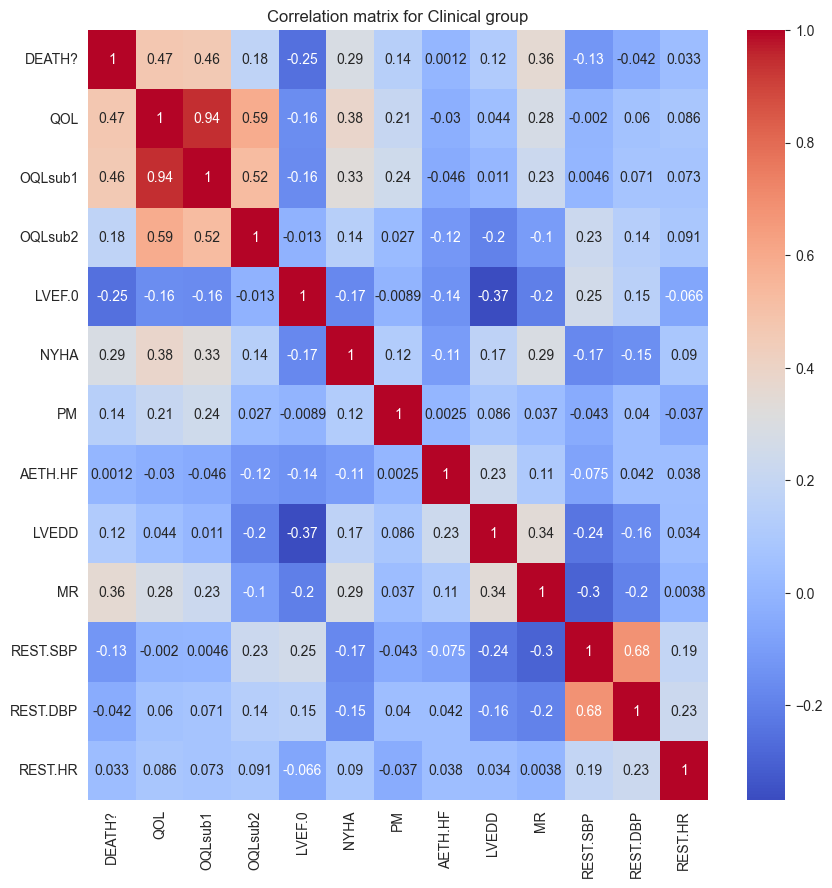

Correlation matrix:
             DEATH?       QOL   OQLsub1   OQLsub2    LVEF.0      NYHA  \
DEATH?    1.000000  0.474171  0.463191  0.176313 -0.253049  0.288653   
QOL       0.474171  1.000000  0.944003  0.590625 -0.155811  0.380382   
OQLsub1   0.463191  0.944003  1.000000  0.524339 -0.160573  0.330844   
OQLsub2   0.176313  0.590625  0.524339  1.000000 -0.012823  0.140732   
LVEF.0   -0.253049 -0.155811 -0.160573 -0.012823  1.000000 -0.174553   
NYHA      0.288653  0.380382  0.330844  0.140732 -0.174553  1.000000   
PM        0.144413  0.205376  0.241995  0.026676 -0.008941  0.123489   
AETH.HF   0.001215 -0.030461 -0.045850 -0.121372 -0.143433 -0.105508   
LVEDD     0.117201  0.043906  0.010669 -0.196687 -0.368206  0.168022   
MR        0.358618  0.278236  0.226476 -0.103497 -0.203522  0.291369   
REST.SBP -0.125436 -0.002035  0.004612  0.225610  0.251855 -0.174896   
REST.DBP -0.041520  0.060317  0.070874  0.136397  0.154961 -0.149657   
REST.HR   0.032708  0.086065  0.072761  0.0

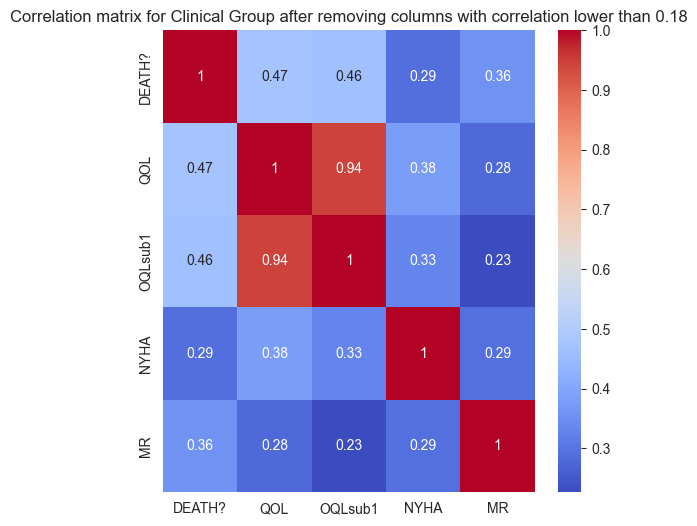

Number of attributes after removing columns with correlation lower than 0.18: 5
Attributes after removing columns with correlation lower than 0.18: Index(['DEATH?', 'QOL', 'OQLsub1', 'NYHA', 'MR'], dtype='object')


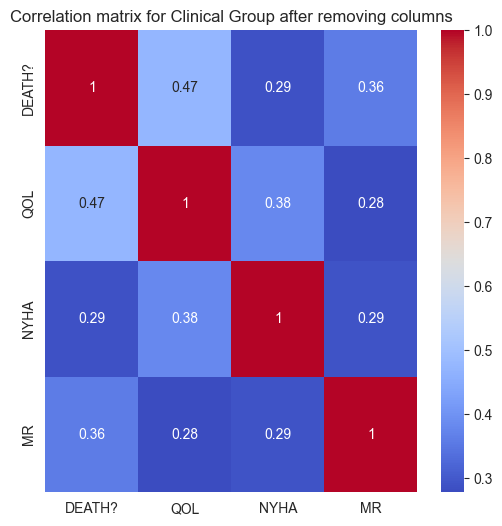

Number of attributes after removing columns: 4
Attributes after removing columns: Index(['DEATH?', 'QOL', 'NYHA', 'MR'], dtype='object')
Cross validation score before grid search: 0.4839323467230444
Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.5533826638477801
Cross validation score after grid search: 0.5785940803382663
Mean cross validation score after optimize: 0.5785940803382663
Growth of cross validation score: 0.0946617336152219
  feature  importance
1     QOL    0.813847
2      MR    0.186153
0  DEATH?    0.000000


In [126]:
corr_matrix = clinical_group.corr()
# Plot correlation chart
plot_corr_matrix(clinical_group, 'Clinical group', (10, 10))
print(f"Correlation matrix:\n {corr_matrix}")
# Prepare data with correlation, missing values and importance
group_checking = prepare_group_checking(clinical_group)

# Prepare data for Decision Tree Classifier
X = clinical_group.drop(columns=['NYHA'])
y = clinical_group['NYHA']

model = DecisionTreeClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

group_checking = add_importance_to_group_checking(group_checking, feature_importances, X)
group_checking = convert_group_checking_to_dataframe(group_checking)

print("=============================================")
print("Features importance:")
print_feature_importances(feature_importances, X)
print("=============================================")

print(group_checking)

# Print boxplots for variables 'LVEF.0','QOL', 'OQLsub1'
# box_plots = ['LVEF.0', 'QOL', 'OQLsub1']
# for column in box_plots:
    # plot_boxplot(clinical_group, column, (6, 6), y=column)


# Remove column with correlation lower than 0.15
columns_to_remove = group_checking[group_checking['correlation'] < 0.18].index
print(f"Columns to remove: {columns_to_remove}")
print(f"Number of columns to remove: {len(columns_to_remove)}")

clinical_group = clinical_group.drop(columns=columns_to_remove)


plot_corr_matrix(clinical_group,
                 'Clinical Group after removing columns with correlation lower than 0.18',
                 (6, 6))

print(f"Number of attributes after removing columns with correlation lower than 0.18: {len(clinical_group.columns)}")
print(f"Attributes after removing columns with correlation lower than 0.18: {clinical_group.columns}")

# Remove QOL and OQLsub2 columns - they are highly correlated with OQLsub1
columns_to_remove = ['OQLsub1']
clinical_group = clinical_group.drop(columns=columns_to_remove)

# Additionally remove LVEDD and MR columns
# columns_to_remove = ['LVEDD', 'MR']
# clinical_group = clinical_group.drop(columns=columns_to_remove)

plot_corr_matrix(clinical_group, 'Clinical Group after removing columns', (6, 6))
print(f"Number of attributes after removing columns: {len(clinical_group.columns)}")
print(f"Attributes after removing columns: {clinical_group.columns}")

X = clinical_group.drop(columns=['NYHA'])
y = clinical_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
clinical_model = grid_search.best_estimator_

test_with_cross_validation(clinical_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(clinical_model.feature_importances_, X)

# Conclusion from clinical group:
From the above table we can see that the most important variables are:
- OQLsub1 - left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping. According to the definition value = 45 or lower is characteristic for systolic heart failure.
- LVEF.0 - left ventricular ejection fraction
- MR - mitral regurgitation - information from the heart ultrasound reflecting the efficiency of pumping. According to the definition value = 45 or lower is characteristic for systolic heart failure.
- DEATH? - information about the patient's death
From this group we choose QOL and LVEF.0 variables as discriminative variables. And replace missing values with mean value.

---
# Technical group
## Technical group description
The technical group contains variables that are not directly related to the patient's health. These are variables such as the date of the examination, the date of death, the date of birth, etc.

## Technical group variables
**DEATHDATE** [VAR2] - date - date of death (if death=1) or date of the confirmation that the patient is still alive
**TIMEFU** [VAR3] - number - number of days between examination and date death or  date of the confirmation that the patient is still alive
**DOB** [VAR7] - date - date of birth
**DOE** [VAR8] - date - date of the examination

---

# Data preparation

In [127]:
technical_group = data[groups['technical']].copy()

# Print columns
print(f"Technical group columns: {technical_group.columns}")
print(f"Missing values: {technical_group.isnull().sum()}")
print(f"The total number of missing values: {technical_group.isnull().sum().sum()}")
# Validation of each column

# Check DEATHDATE column (date)
print(f"Type of DEATHDATE column: {technical_group['DEATHDATE'].dtypes}")
print(f"DEATHDATE column unique values: {technical_group['DEATHDATE'].unique()}")
# Set all missing values with backward fill
technical_group['DEATHDATE'] = technical_group['DEATHDATE'].fillna(method='bfill')

# Check TIMEFU column (number)
print(f"Type of column TIMEFU: {technical_group['TIMEFU'].dtypes}")
print(f"TIMEFU column unique values: {technical_group['TIMEFU'].unique()}")
# Set incorrect string values to NaN
technical_group["TIMEFU"] = technical_group["TIMEFU"].apply(lambda x: np.nan if type(x) == str else x)
# Set all missing values with backward fill
technical_group["TIMEFU"] = technical_group["TIMEFU"].fillna(method='bfill')

# Check DOE column (date)
print(f"Type of DOE column: {technical_group['DOE'].dtypes}")
print(f"DOE column unique values: {technical_group['DOE'].unique()}")
# Set all missing values with backward fill
technical_group['DOE'] = technical_group['DOE'].fillna(method='bfill')

# Check DOB column (date)
print(f"Type of DOB column: {technical_group['DOB'].dtypes}")
print(f"DOB column unique values: {technical_group['DOB'].unique()}")
# Set all missing values with backward fill
technical_group['DOB'] = technical_group['DOB'].fillna(method='bfill')

# Add NYHA target variable
technical_group['NYHA'] = NYHA

Technical group columns: Index(['DEATHDATE', 'TIMEFU', 'DOB', 'DOE'], dtype='object')
Missing values: DEATHDATE    78
TIMEFU       97
DOB           7
DOE           0
dtype: int64
The total number of missing values: 182
Type of DEATHDATE column: datetime64[ns]
DEATHDATE column unique values: <DatetimeArray>
['2012-02-03 00:00:00', '2012-08-12 00:00:00', '2012-02-21 00:00:00',
 '2013-02-03 00:00:00', '2012-04-06 00:00:00', '2012-12-21 00:00:00',
 '2006-04-15 00:00:00', '2013-02-02 00:00:00', '2007-11-08 00:00:00',
 '2011-06-10 00:00:00',
 ...
 '2012-05-01 00:00:00', '2009-09-12 00:00:00', '2010-07-29 00:00:00',
 '2009-07-07 00:00:00', '2006-05-02 00:00:00', '2006-11-05 00:00:00',
 '2011-12-22 00:00:00', '2007-09-29 00:00:00', '2008-04-19 00:00:00',
 '2007-06-15 00:00:00']
Length: 261, dtype: datetime64[ns]
Type of column TIMEFU: object
TIMEFU column unique values: [2076 2316 2349 2459 2629 2244 2506 39 2317 499 2435 1851 314 2203 772
 2517 2736 427 522 2569 2487 1249 1277 678 2137 2364 1

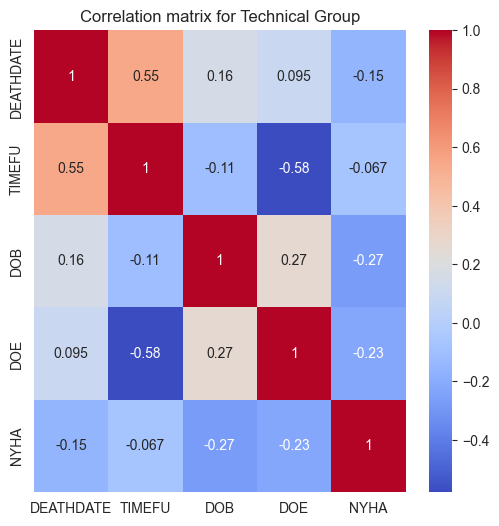

           correlation  missing_values
DOB           0.272968               0
DOE           0.225807               0
DEATHDATE     0.153456               0
TIMEFU        0.067102               0


In [128]:
plot_corr_matrix(technical_group, 'Technical Group', (6, 6))

# Print together corelation values for NYHA target variable with number of missing values
checking_data = prepare_group_checking(technical_group)
checking_data = convert_group_checking_to_dataframe(checking_data, columns=['correlation', 'missing_values'])
print(checking_data)

## Conclusion from technical group:
From the above table we don't see any variable with high correlation with NYHA target variable. So we will not use any variable from this group.

---
# Demographic group
## Demographic group description
The group contains only one variable - age.

## Demographic group variables
**AGE** [VAR9] - number - age at examination

---

# Data preparation

In [129]:
demographic_group = data[groups['demographic']].copy()
print(f"Demographic group columns: {demographic_group.columns}")
print(f"Missing values: {demographic_group.isnull().sum()}")
# Validation of each column

# Check AGE column (number)
print(f"Type of AGE column: {demographic_group['AGE'].dtypes}")
# print(f"AGE column unique values: {demographic_group['AGE'].unique()}")
# Round age to integer
demographic_group['AGE'] = demographic_group['AGE'].round()
# Set all missing values with backward fill
demographic_group['AGE'] = demographic_group['AGE'].fillna(method='bfill')
# Change type of AGE column to int
demographic_group['AGE'] = demographic_group['AGE'].astype(int)

# Add NYHA target variable
demographic_group['NYHA'] = NYHA

Demographic group columns: Index(['AGE'], dtype='object')
Missing values: AGE    7
dtype: int64
Type of AGE column: float64


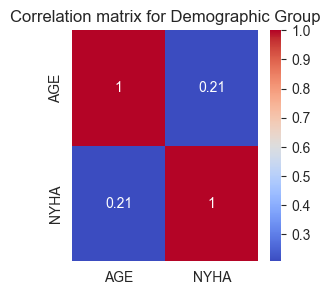

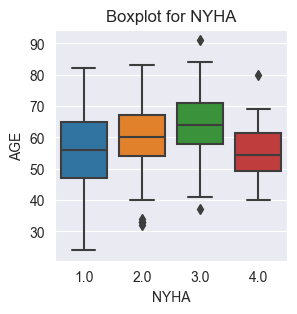

In [130]:
# Print correlation chart
plot_corr_matrix(demographic_group, 'Demographic Group', (3, 3))

# Print boxplot for NYHA and AGE
plot_boxplot(demographic_group, 'NYHA', (3, 3), x='NYHA', y='AGE')

# Conclusion from demographic group:
We choose AGE variable as discriminative variable. And replace missing values with mean value.

---
# Antrhopometric group
## Antrhopometric group description
The group contains variables related to the patient's body mass and height.

## Antrhopometric group variables
**HEIGHT.CM** [VAR10] - number - body height in cm
**WEIGHT.KG** [VAR11] - number - body mass in kg
**BMI** [VAR12] - number - body mass index (mass per squared height); <18.5=underweight range, 18.5 to <25 = normal, 25 - <30 = overweight, 30.0 or higher = obese.

---

# Data preparation

In [131]:
# Create anthropometric group
anthropometric_group = data[groups['anthropometry']].copy()
print(f"Anthropometry group columns: {anthropometric_group.columns}")
print(f"Mising values: {anthropometric_group.isnull().sum()}")
print(f"Total missing values: {anthropometric_group.isnull().sum().sum()}")

# Validation of each column

# Check HEIGHT.CM column (number)
print(f"Type of HEIGHT.CM column: {anthropometric_group['HEIGHT.CM'].dtypes}")
# print(f"HEIGHT.CM column unique values: {anthropometric_group['HEIGHT.CM'].unique()}")
print(f"Max value of HEIGHT.CM column: {anthropometric_group['HEIGHT.CM'].max()}")
print(f"Min value of HEIGHT.CM column: {anthropometric_group['HEIGHT.CM'].min()}")

# Check WEIGHT.KG column (number)
print(f"Type of WEIGHT.KG column: {anthropometric_group['WEIGHT.KG'].dtypes}")
# print(f"WEIGHT.KG column unique values: {anthropometric_group['WEIGHT.KG'].unique()}")
print(f"Max value of WEIGHT.KG column: {anthropometric_group['WEIGHT.KG'].max()}")
print(f"Min value of WEIGHT.KG column: {anthropometric_group['WEIGHT.KG'].min()}")

# Check BMI column (number)
print(f"Type of BMI column: {anthropometric_group['BMI'].dtypes}")
# print(f"BMI column unique values: {anthropometric_group['BMI'].unique()}")
print(f"Max value of BMI column: {anthropometric_group['BMI'].max()}")
print(f"Min value of BMI column: {anthropometric_group['BMI'].min()}")

# Add NYHA target variable
anthropometric_group['NYHA'] = NYHA

Anthropometry group columns: Index(['HEIGHT.CM', 'WEIGHT.KG', 'BMI'], dtype='object')
Mising values: HEIGHT.CM    0
WEIGHT.KG    0
BMI          0
dtype: int64
Total missing values: 0
Type of HEIGHT.CM column: float64
Max value of HEIGHT.CM column: 190.0
Min value of HEIGHT.CM column: 158.0
Type of WEIGHT.KG column: float64
Max value of WEIGHT.KG column: 144.0
Min value of WEIGHT.KG column: 49.0
Type of BMI column: float64
Max value of BMI column: 44.4444444444444
Min value of BMI column: 16.0664819944598


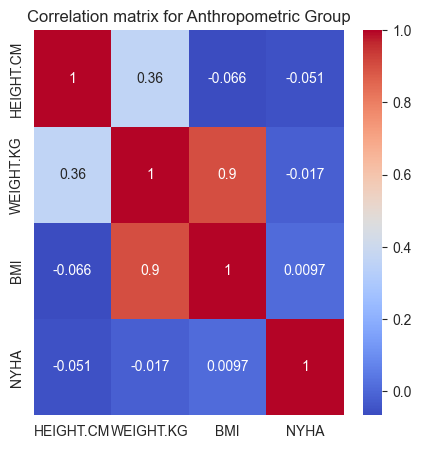

           HEIGHT.CM  WEIGHT.KG       BMI      NYHA
HEIGHT.CM   1.000000   0.361015 -0.066306 -0.051383
WEIGHT.KG   0.361015   1.000000  0.903655 -0.017385
BMI        -0.066306   0.903655  1.000000  0.009694
NYHA       -0.051383  -0.017385  0.009694  1.000000
           correlation  missing_values
HEIGHT.CM     0.051383               0
WEIGHT.KG     0.017385               0
BMI           0.009694               0


In [132]:
plot_corr_matrix(anthropometric_group, 'Anthropometric Group', (5, 5))
corr = anthropometric_group.corr()
print(corr)
# Print together corelation values for NYHA target variable with number of missing values
group_checking = prepare_group_checking(anthropometric_group)
group_checking = convert_group_checking_to_dataframe(group_checking, columns=['correlation', 'missing_values'])
print(group_checking)

# Conclusion from anthropometric group:
From the above table we don't see any variable with high correlation with NYHA target variable. So we will not use any variable from this group.

---
# Comorbidities group
## Comorbidities group description
The group contains variables related to the patient's comorbidities.

## Comorbidities group variables
**MI** [VAR17] - binary - information about previous myocardial infarction (1=yes)
**AF** [VAR18] - binary - information about atrial fibrillation (1=yes)
**DM** [VAR19] - binary - information about diabetes (1=yes)
**HT** [VAR20] - binary - information about hypertension (1=yes)
**COPD** [VAR21] - binary - information about lung  disease (1=yes)
**STROKE** [VAR22] - binary - information about previous stroke (1=yes)
**KIDNEY.DIS** [VAR23] - binary - information about kidney disease (1=yes)

---

# Data preparation

In [133]:
# Create comorbidities group
comorbidities_group = data[groups['comorbidities']].copy()
print(f"Comorbidities group columns: {comorbidities_group.columns}")
print(f"Mising values:\n{comorbidities_group.isnull().sum()}")
print(f"Total missing values: {comorbidities_group.isnull().sum().sum()}")
# Validation of each column

# Check MI column (binary)
print(f"Type of MI column: {comorbidities_group['MI'].dtypes}")
print(f"MI column unique values: {comorbidities_group['MI'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['MI'] = comorbidities_group['MI'].fillna(0)

# Check AF column (binary)
print(f"Type of AF column: {comorbidities_group['AF'].dtypes}")
print(f"AF column unique values: {comorbidities_group['AF'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['AF'] = comorbidities_group['AF'].fillna(0)

# Check DM column (binary)
print(f"Type of DM column: {comorbidities_group['DM'].dtypes}")
print(f"DM column unique values: {comorbidities_group['DM'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['DM'] = comorbidities_group['DM'].fillna(0)

# Check HT column (binary)
print(f"Type of HT column: {comorbidities_group['HT'].dtypes}")
print(f"HT column unique values: {comorbidities_group['HT'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['HT'] = comorbidities_group['HT'].fillna(0)

# Check COPD column (binary)
print(f"Type of COPD column: {comorbidities_group['COPD'].dtypes}")
print(f"COPD column unique values: {comorbidities_group['COPD'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['COPD'] = comorbidities_group['COPD'].fillna(0)

# Check STROKE column (binary)
print(f"Type of STROKE column: {comorbidities_group['STROKE'].dtypes}")
print(f"STROKE column unique values: {comorbidities_group['STROKE'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['STROKE'] = comorbidities_group['STROKE'].fillna(0)

# Check KIDNEY.DIS column (binary)
print(f"Type of KIDNEY.DIS column: {comorbidities_group['KIDNEY.DIS'].dtypes}")
print(f"KIDNEY.DIS column unique values: {comorbidities_group['KIDNEY.DIS'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['KIDNEY.DIS'] = comorbidities_group['KIDNEY.DIS'].fillna(0)

# Add NYHA target variable
comorbidities_group['NYHA'] = NYHA

Comorbidities group columns: Index(['MI', 'AF', 'DM', 'HT', 'COPD', 'STROKE', 'KIDNEY.DIS'], dtype='object')
Mising values:
MI            21
AF             4
DM            21
HT            95
COPD          37
STROKE        35
KIDNEY.DIS    70
dtype: int64
Total missing values: 283
Type of MI column: float64
MI column unique values: [ 1.  0. nan]
Type of AF column: float64
AF column unique values: [ 0.  1. nan]
Type of DM column: float64
DM column unique values: [ 1.  0. nan]
Type of HT column: float64
HT column unique values: [ 1.  0. nan]
Type of COPD column: float64
COPD column unique values: [ 0.  1. nan]
Type of STROKE column: float64
STROKE column unique values: [ 0.  1. nan]
Type of KIDNEY.DIS column: float64
KIDNEY.DIS column unique values: [ 0.  1. nan]


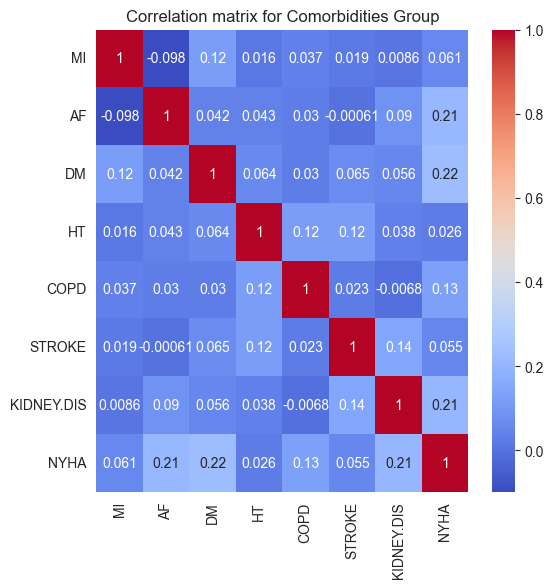

                  MI        AF        DM        HT      COPD    STROKE  \
MI          1.000000 -0.097777  0.117682  0.016081  0.037324  0.019431   
AF         -0.097777  1.000000  0.042245  0.042742  0.029606 -0.000608   
DM          0.117682  0.042245  1.000000  0.063990  0.029606  0.065388   
HT          0.016081  0.042742  0.063990  1.000000  0.119868  0.118551   
COPD        0.037324  0.029606  0.029606  0.119868  1.000000  0.023051   
STROKE      0.019431 -0.000608  0.065388  0.118551  0.023051  1.000000   
KIDNEY.DIS  0.008576  0.089955  0.056328  0.037759 -0.006759  0.142989   
NYHA        0.060582  0.209801  0.223841  0.025714  0.126027  0.055304   

            KIDNEY.DIS      NYHA  
MI            0.008576  0.060582  
AF            0.089955  0.209801  
DM            0.056328  0.223841  
HT            0.037759  0.025714  
COPD         -0.006759  0.126027  
STROKE        0.142989  0.055304  
KIDNEY.DIS    1.000000  0.206519  
NYHA          0.206519  1.000000  
            correl

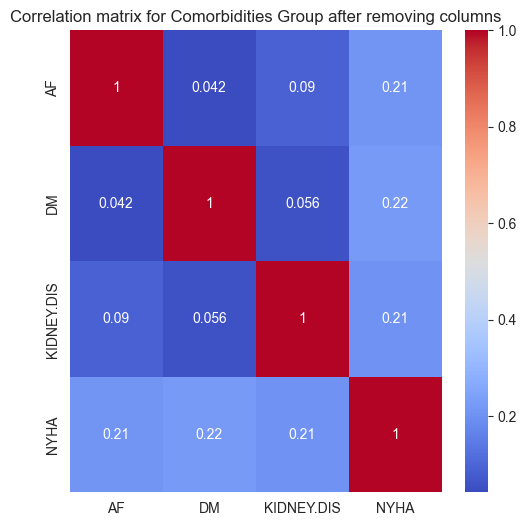

Cross validation score after grid search: 0.4952959830866808
Mean cross validation score after optimize: 0.4952959830866808
Growth of cross validation score: 0.011363636363636409
      feature  importance
1          DM    0.442883
2  KIDNEY.DIS    0.342886
0          AF    0.214231


In [134]:
# Print correlation chart
plot_corr_matrix(comorbidities_group, 'Comorbidities Group', (6, 6))

group_checking = prepare_group_checking(comorbidities_group)
corr = comorbidities_group.corr()
print(corr)

# Print together corelation values for NYHA target variable with number of missing values
X = comorbidities_group.drop(columns=['NYHA'])
y = comorbidities_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

group_checking = add_importance_to_group_checking(group_checking, model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.15
columns_to_remove = group_checking[group_checking['correlation'] < 0.15].index
print(f"Columns to remove: {columns_to_remove}")
print(f"Columns before removing: {comorbidities_group.columns}")
comorbidities_group = comorbidities_group.drop(columns=columns_to_remove)
print(f"Columns retained: {comorbidities_group.columns}")
plot_corr_matrix(comorbidities_group, 'Comorbidities Group after removing columns', (6, 6))

X = comorbidities_group.drop(columns=['NYHA'])
y = comorbidities_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

# grid_search, before_grid_search = create_grid_search(model, X, y)
# comorbidities_model = grid_search.best_estimator_

comorbidities_model = model
test_with_cross_validation(comorbidities_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(comorbidities_model.feature_importances_, X)

# Conclusion from comorbidities group:
From the above table we can see that the most important variables are:
- AF - atrial fibrillation (migotanie przedsionków)
- KIDNEY.DIS - kidney disease (choroba nerek)
- DM - diabetes mellitus (cukrzyca)

---
# Treatment group

## Treatment group description
The treatment group contains information about treatment of patients.

## Treatment group variables
- **ACEI.ARB** [VAR24] - binary - information about treatment using ace-inhibitors or ARB (similar drugs, 1=yes)
- **BB** [VAR25] - binary - information about treatment using beta blockers (1=yes)
- **MRA** [VAR26] - binary - information about treatment using  aldosterone antagonists (1=yes)
- **DIUR** [VAR27] - binary - information about treatment using oral diuretics (1=yes)
- **ANTIPLAT** [VAR28] - binary - information about treatment using antiplatelet drugs (1=yes)
- **STATIN** [VAR29] - binary - information about treatment using statin (1=yes)
- **DIGOX** [VAR30] - binary - information about treatment using digoxin (1=yes)

---

# Data preparation

In [135]:
# Create treatment group
treatment_group = data[groups['treatment']].copy()
print(f"Treatment group columns: {treatment_group.columns}")
print(f"Missing values: {treatment_group.isnull().sum()}")
print(f"Total missing values: {treatment_group.isnull().sum().sum()}")
# Validation of each column

# Check ACEI.ARB column (binary)
print(f"Type of ACEI.ARB column: {treatment_group['ACEI.ARB'].dtypes}")
print(f"ACEI.ARB column unique values: {treatment_group['ACEI.ARB'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['ACEI.ARB'] = treatment_group['ACEI.ARB'].fillna(0)

# Check BB column (binary)
print(f"Type of BB column: {treatment_group['BB'].dtypes}")
print(f"BB column unique values: {treatment_group['BB'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['BB'] = treatment_group['BB'].fillna(0)

# Check MRA column (binary)
print(f"Type of MRA column: {treatment_group['MRA'].dtypes}")
print(f"MRA column unique values: {treatment_group['MRA'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['MRA'] = treatment_group['MRA'].fillna(0)

# Check DIUR column (binary)
print(f"Type of DIUR column: {treatment_group['DIUR'].dtypes}")
print(f"DIUR column unique values: {treatment_group['DIUR'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['DIUR'] = treatment_group['DIUR'].fillna(0)

# Check ANTIPLAT column (binary)
print(f"Type of ANTIPLAT column: {treatment_group['ANTIPLAT'].dtypes}")
print(f"ANTIPLAT column unique values: {treatment_group['ANTIPLAT'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['ANTIPLAT'] = treatment_group['ANTIPLAT'].fillna(0)

# Check STATIN column (binary)
print(f"Type of STATIN column: {treatment_group['STATIN'].dtypes}")
print(f"STATIN column unique values: {treatment_group['STATIN'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['STATIN'] = treatment_group['STATIN'].fillna(0)

# Check DIGOX column (binary)
print(f"Type of DIGOX column: {treatment_group['DIGOX'].dtypes}")
print(f"DIGOX column unique values: {treatment_group['DIGOX'].unique()}")
# In DIGOX we have additional value 9.0 - unknown so we replace it with 0
treatment_group['DIGOX'] = treatment_group['DIGOX'].replace(9.0, 0)
print(f"DIGOX column unique values: {treatment_group['DIGOX'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['DIGOX'] = treatment_group['DIGOX'].fillna(0)

# Check if there are any missing values
print(f"Missing values: {treatment_group.isnull().sum()}")

# Add NYHA target variable
treatment_group['NYHA'] = NYHA

Treatment group columns: Index(['ACEI.ARB', 'BB', 'MRA', 'DIUR', 'ANTIPLAT', 'STATIN', 'DIGOX'], dtype='object')
Missing values: ACEI.ARB     1
BB           1
MRA         12
DIUR         5
ANTIPLAT     1
STATIN       2
DIGOX        2
dtype: int64
Total missing values: 24
Type of ACEI.ARB column: float64
ACEI.ARB column unique values: [ 1.  0. nan]
Type of BB column: float64
BB column unique values: [ 1.  0. nan]
Type of MRA column: float64
MRA column unique values: [ 1.  0. nan]
Type of DIUR column: float64
DIUR column unique values: [ 1.  0. nan]
Type of ANTIPLAT column: float64
ANTIPLAT column unique values: [ 1.  0. nan]
Type of STATIN column: float64
STATIN column unique values: [ 1.  0. nan]
Type of DIGOX column: float64
DIGOX column unique values: [ 0.  1.  9. nan]
DIGOX column unique values: [ 0.  1. nan]
Missing values: ACEI.ARB    0
BB          0
MRA         0
DIUR        0
ANTIPLAT    0
STATIN      0
DIGOX       0
dtype: int64


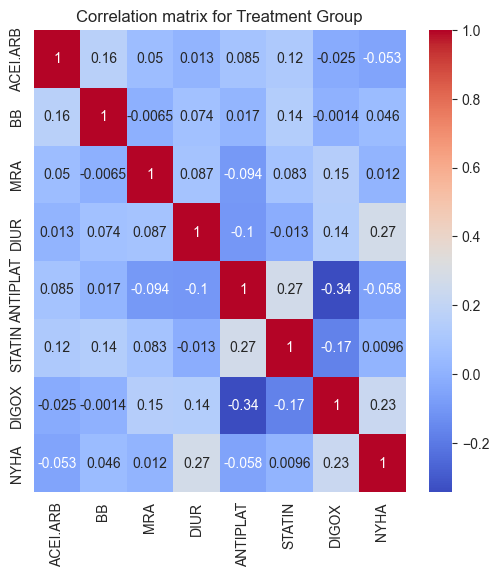

          ACEI.ARB        BB       MRA      DIUR  ANTIPLAT    STATIN  \
ACEI.ARB  1.000000  0.163670  0.050237  0.012692  0.084580  0.123657   
BB        0.163670  1.000000 -0.006510  0.074173  0.016979  0.143705   
MRA       0.050237 -0.006510  1.000000  0.086566 -0.094054  0.083271   
DIUR      0.012692  0.074173  0.086566  1.000000 -0.100956 -0.013022   
ANTIPLAT  0.084580  0.016979 -0.094054 -0.100956  1.000000  0.269024   
STATIN    0.123657  0.143705  0.083271 -0.013022  0.269024  1.000000   
DIGOX    -0.024610 -0.001360  0.149492  0.143817 -0.343332 -0.171244   
NYHA     -0.053492  0.045918  0.011529  0.272989 -0.058384  0.009574   

             DIGOX      NYHA  
ACEI.ARB -0.024610 -0.053492  
BB       -0.001360  0.045918  
MRA       0.149492  0.011529  
DIUR      0.143817  0.272989  
ANTIPLAT -0.343332 -0.058384  
STATIN   -0.171244  0.009574  
DIGOX     1.000000  0.232251  
NYHA      0.232251  1.000000  
          correlation  missing_values  importance
DIUR         0.272989 

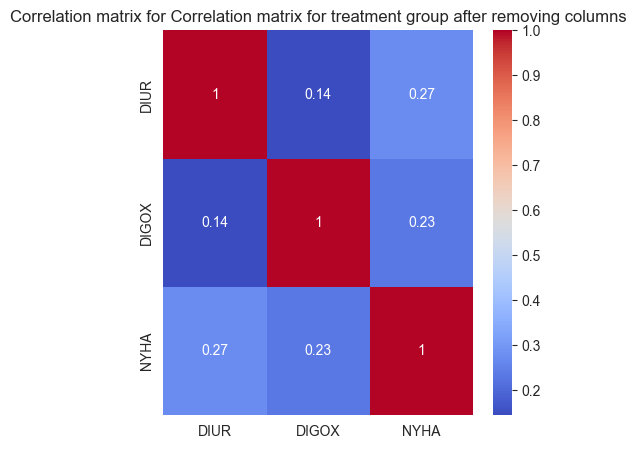

Cross validation score before grid search: 0.4748942917547569
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best score: 0.4835095137420719
Cross validation score after grid search: 0.4747885835095137
Mean cross validation score after optimize: 0.4747885835095137
Growth of cross validation score: -0.00010570824524319677
  feature  importance
0    DIUR    0.663674
1   DIGOX    0.336326


In [136]:
# Correlation matrix
plot_corr_matrix(treatment_group, 'Treatment Group', (6, 6))
corr = treatment_group.corr()
print(corr)


group_checking = prepare_group_checking(treatment_group)

# Find important variables and replace all missing values with 0 (no treatment)
treatment_group = treatment_group.fillna(0)

# Prepare data for Decision Tree Classifier
X = treatment_group.drop(columns=['NYHA'])
y = treatment_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)
group_checking = add_importance_to_group_checking(group_checking, model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.20
columns_to_remove = group_checking[group_checking['correlation'] < 0.20].index
treatment_group = treatment_group.drop(columns=columns_to_remove)

plot_corr_matrix(treatment_group, 'Correlation matrix for treatment group after removing columns', (5, 5))

X = treatment_group.drop(columns=['NYHA'])
y = treatment_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
treatment_model = grid_search.best_estimator_

test_with_cross_validation(treatment_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(treatment_model.feature_importances_, X)

# Conclusion from treatment group:

From the above table we can see that the most important variables are:
- DIUR - diuretics (leki moczopędne)
- DIGOX - digoxin (leki glikozydowe)

---
# Biochemistry group
## Biochemistry group description
This group contains variables from biochemistry tests.

## Biochemistry group variables
- **HB** [VAR31] - number - level of blood hemoglobin
- **NA** [VAR32] - number - level of blood sodium
- **K** [VAR33] - number - level of blood potassium
- **BNP** [VAR34] - number - level of blood peptide: BNP (elevated level is characteristic for heart failure)
- **CRP** [VAR35] - number - level of blood protein CRP (characteristic for inflammation)

---

# Data preparation

In [137]:
# Create biochemistry group
biochemistry_group = data[groups['biochemistry']].copy()
print(f"Biochemistry group columns: {biochemistry_group.columns}")
print(f"Missing values: {biochemistry_group.isnull().sum()}")
print(f"Total of missing values: {biochemistry_group.isnull().sum().sum()}")

# Validation of each column

# Check HB column (number)
print(f"Type of HB column: {biochemistry_group['HB'].dtypes}")
# print(f"HB column unique values: {biochemistry_group['HB'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['HB'] = biochemistry_group['HB'].fillna(method='bfill')

# Check NA column (number)
print(f"Type of NA column: {biochemistry_group['NA'].dtypes}")
# print(f"NA column unique values: {biochemistry_group['NA'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['NA'] = biochemistry_group['NA'].fillna(method='bfill')

# Check K column (number)
print(f"Type of K column: {biochemistry_group['K'].dtypes}")
# print(f"K column unique values: {biochemistry_group['K'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['K'] = biochemistry_group['K'].fillna(method='bfill')

# Check BNP column (number)
print(f"Type of BNP column: {biochemistry_group['BNP'].dtypes}")
# print(f"BNP column unique values: {biochemistry_group['BNP'].unique()}")
# In BNP we have additional value 9999.0 - unknown so we replace it with NaN
is_string = biochemistry_group['BNP'].apply(lambda x: isinstance(x, str))
biochemistry_group['BNP'] = biochemistry_group['BNP'].where(~is_string, np.nan)
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['BNP'] = biochemistry_group['BNP'].fillna(method='bfill')

# Check CRP column (number)
print(f"Type of CRP column: {biochemistry_group['CRP'].dtypes}")
# print(f"CRP column unique values: {biochemistry_group['CRP'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['CRP'] = biochemistry_group['CRP'].fillna(method='bfill')

# Add NYHA target variable
biochemistry_group['NYHA'] = NYHA

Biochemistry group columns: Index(['HB', 'NA', 'K', 'BNP', 'CRP'], dtype='object')
Missing values: HB      12
NA      11
K       12
BNP     41
CRP    126
dtype: int64
Total of missing values: 202
Type of HB column: float64
Type of NA column: float64
Type of K column: float64
Type of BNP column: object
Type of CRP column: float64


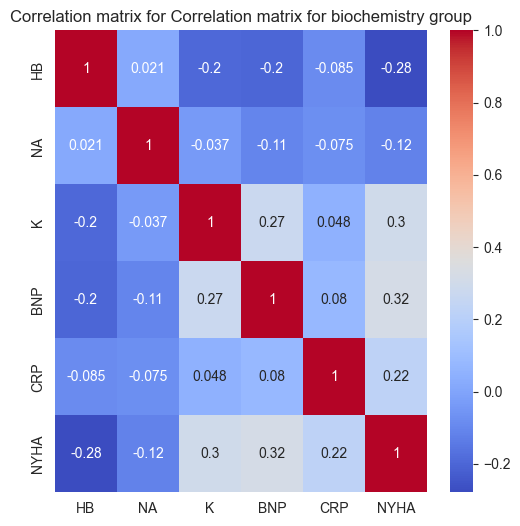

            HB        NA         K       BNP       CRP      NYHA
HB    1.000000  0.020577 -0.198398 -0.202477 -0.084706 -0.278847
NA    0.020577  1.000000 -0.037300 -0.108866 -0.074997 -0.118601
K    -0.198398 -0.037300  1.000000  0.272217  0.048122  0.299508
BNP  -0.202477 -0.108866  0.272217  1.000000  0.080082  0.317119
CRP  -0.084706 -0.074997  0.048122  0.080082  1.000000  0.221419
NYHA -0.278847 -0.118601  0.299508  0.317119  0.221419  1.000000
     correlation  missing_values  importance
BNP     0.317119               0    0.255529
K       0.299508               0    0.265920
HB      0.278847               0    0.142715
CRP     0.221419               0    0.192853
NA      0.118601               0    0.142983
Columns with correlation higher or equal 0.25: BNP     True
K       True
HB      True
CRP    False
NA     False
Name: correlation, dtype: bool


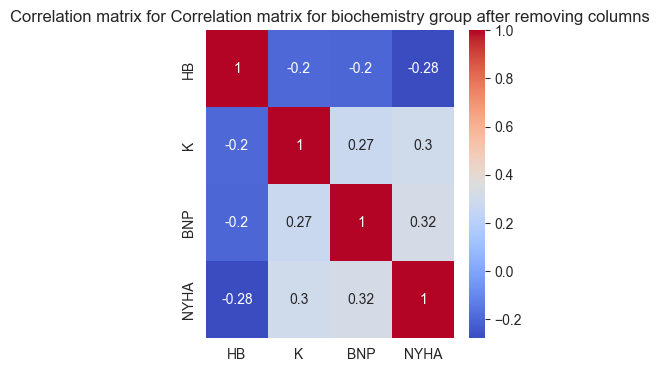

Cross validation score after grid search: 0.4862050739957716
Mean cross validation score after optimize: 0.4862050739957716
Growth of cross validation score: 0.011310782241014727
  feature  importance
2     BNP    0.391870
1       K    0.334021
0      HB    0.274108


In [138]:
# Correlation matrix
plot_corr_matrix(biochemistry_group, 'Correlation matrix for biochemistry group', (6, 6))
corr = biochemistry_group.corr()
print(corr)

# Check correlation with NYHA
group_checking = prepare_group_checking(biochemistry_group)

# Find important variables and replace all missing values with bifill (use next valid observation to fill gap)
biochemistry_group = biochemistry_group.fillna(method='bfill')

# Prepare data for Decision Tree Classifier
X = biochemistry_group.drop(columns=['NYHA'])
y = biochemistry_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

group_checking = add_importance_to_group_checking(group_checking, model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.25
columns_to_remove = group_checking[group_checking['correlation'] < 0.25].index
biochemistry_group = biochemistry_group.drop(columns=columns_to_remove)
print(f"Columns with correlation higher or equal 0.25: {group_checking['correlation'] >= 0.25}")

plot_corr_matrix(biochemistry_group, 'Correlation matrix for biochemistry group after removing columns', (4, 4))

X = biochemistry_group.drop(columns=['NYHA'])
y = biochemistry_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

# grid_search, before_grid_search = create_grid_search(model, X, y)
# biochemistry_model = grid_search.best_estimator_

biochemistry_model = model
test_with_cross_validation(biochemistry_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(biochemistry_model.feature_importances_, X)

# Conclusion from biochemistry group:
From the above table we can see that the most important variables are:
- BNP - level of blood peptide (poziom peptydu BNP) (podwyższony poziom BNP wskazuje na niewydolność serca)
- K - level of potassium (poziom potasu)
- HB - level of hemoglobin (poziom hemoglobiny)

---
# Fitness level group
## Fitness level group description
The fitness level group contains variables that describe the patient's fitness level.

## Fitness level group variables
- **EXERCISE1** [VAR41] - number - number of seconds needed to complete the task, higher number = worse
- **EXERCISE2** [VAR42] - number - number of repeated movements during the task (higher number = better result)
- **EXERCISE3** [VAR43] - number - number of repeated movements during the task (higher number = better result)
- **6MWT.DIST** [VAR44] - number - number of meters (distance) covered by the patient during the 6 minute walking test (bigger number = better)
- **6MWT.FATIGUE** [VAR45] - number OR categories(?) - the level of fatigue assessed by the patient after walking test (using a scale 0-10)
- **6MWT.DYSPN** [VAR46] - number OR categories(?) - the level of shortness of breath during walking test assessed by the patient  (using a scale 0-10)
- **6MWT.SBP1** [VAR47] - number - systolic blood pressure measured before the walking test
- **6MWT.DBP1** [VAR48] - number - diastolic blood pressure measured before the walking test
- **6MWT.HR1** [VAR49] - number - heart rate measured before the walking test
- **6MWT.SBP2** [VAR50] - number - systolic blood pressure measured after the walking test
- **6MWT.DBP2** [VAR51] - number - diastolic blood pressure measured after the walking test
- **6MWT.HR2** [VAR52] - number - heart rate measured after the walking test
- **EXERCISE4** [VAR53] - number - the patient is asked to touch his/her feet with the fingers of the palms. The number represents centimeters. Negative number means: number of centimeters  between the patients palm and leg in case of failing to touch the feet (higher number of negative centimeters = worse result). Positive number means that the patient could touch his feet without problems (higher number - better result)
- **EXERCISE5** [VAR54] - number - the patient is asked to touch left palm with the right one but it has to be done at his back (one palm is directed up, the second is directed down). The number represents centimeters. Negative number means: number of centimeters  between the patients palms in case of failing to touch both palms (higher number of negative centimeters = worse result). Positive number means that the patient could touch his palms without problems (higher number - better result)
- **CPX.TIME** [VAR55] - number - time of exercise on a treadmill
- **CPX.PEAKVO2** [VAR56] - number - peak oxygen consumption during exercise testing on a treadmill
- **CPX.PEAKVO2FORBM** [VAR57] - number - peak oxygen consumption during exercise testing on a treadmill per body mass
- **RER** [VAR58] - number - respiratory exchange ratio(index of metabolism during an exercise on a treadmill)
- **SLOPE** [VAR59] - number - slope between oxygen and carbon dioxide during exercise testing on a treadmill
- **METS** [VAR60] - number - number of metabolic equivalents (level of work performed by the patient during exercise using a treadmill)
- **WEBER** [VAR61] - categories - The Weber classification: stratification of patients based on peak VO2 and anaerobic threshold to define functional physical capacity. Higher class is worse
- **PEAK>18** [VAR62] - binary - Dividing patients based on a cutoff value of peak oxygen consumption (used for Weber)
- **SLOPE>35** [VAR63] - binary - Dividing patients based on a cutoff value of slope (used for Weber)

---

# Prepare fitness level group

In [139]:
# Create fitness_level group
fitness_level_group = data[groups['fitness_level']].copy()
print(f"Fitness level group columns: {fitness_level_group.columns}")
print(f"Missing values: {fitness_level_group.isna().sum()}")
potential_remove_columns = []
# Validation of each column

# EXERCISE1
print(f"EXERCISE1 missing values: {fitness_level_group['EXERCISE1'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE1'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE1'].min()}")
# Replace missing values with the mean
fitness_level_group['EXERCISE1'] = fitness_level_group['EXERCISE1'].fillna(fitness_level_group['EXERCISE1'].mean())

# EXERCISE2
print(f"EXERCISE2 missing values: {fitness_level_group['EXERCISE2'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE2'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE2'].min()}")
# Replace missing values with the mean
fitness_level_group['EXERCISE2'] = fitness_level_group['EXERCISE2'].fillna(fitness_level_group['EXERCISE2'].mean())

# EXERCISE3
print(f"EXERCISE3 missing values: {fitness_level_group['EXERCISE3'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE3'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE3'].min()}")
# Replace missing values with the mean
fitness_level_group['EXERCISE3'] = fitness_level_group['EXERCISE3'].fillna(fitness_level_group['EXERCISE3'].mean())

# 6MWT.DIST
print(f"6MWT.DIST missing values: {fitness_level_group['6MWT.DIST'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DIST'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DIST'].min()}")
# Replace missing values with the mean
fitness_level_group['6MWT.DIST'] = fitness_level_group['6MWT.DIST'].fillna(fitness_level_group['6MWT.DIST'].mean())

# 6MWT.FATIGUE
print(f"6MWT.FATIGUE missing values: {fitness_level_group['6MWT.FATIGUE'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.FATIGUE'].max()}")
print(f"Min value: {fitness_level_group['6MWT.FATIGUE'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.FATIGUE')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.FATIGUE'] = fitness_level_group['6MWT.FATIGUE'].fillna(method='bfill')

# 6MWT.DYSPN
print(f"6MWT.DYSPN missing values: {fitness_level_group['6MWT.DYSPN'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DYSPN'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DYSPN'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.DYSPN')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.DYSPN'] = fitness_level_group['6MWT.DYSPN'].fillna(method='bfill')

# 6MWT.SBP1
print(f"6MWT.SBP1 missing values: {fitness_level_group['6MWT.SBP1'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.SBP1'].max()}")
print(f"Min value: {fitness_level_group['6MWT.SBP1'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.SBP1')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.SBP1'] = fitness_level_group['6MWT.SBP1'].fillna(method='bfill')

# 6MWT.DBP1
print(f"6MWT.DBP1 missing values: {fitness_level_group['6MWT.DBP1'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DBP1'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DBP1'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.DBP1')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.DBP1'] = fitness_level_group['6MWT.DBP1'].fillna(method='bfill')

# 6MWT.HR1
print(f"6MWT.HR1 missing values: {fitness_level_group['6MWT.HR1'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.HR1'].max()}")
print(f"Min value: {fitness_level_group['6MWT.HR1'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.HR1')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.HR1'] = fitness_level_group['6MWT.HR1'].fillna(method='bfill')

# 6MWT.SBP2
print(f"6MWT.SBP2 missing values: {fitness_level_group['6MWT.SBP2'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.SBP2'].max()}")
print(f"Min value: {fitness_level_group['6MWT.SBP2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.SBP2')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.SBP2'] = fitness_level_group['6MWT.SBP2'].fillna(method='bfill')

# 6MWT.DBP2
print(f"6MWT.DBP2 missing values: {fitness_level_group['6MWT.DBP2'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DBP2'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DBP2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.DBP2')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.DBP2'] = fitness_level_group['6MWT.DBP2'].fillna(method='bfill')

# 6MWT.HR2
print(f"6MWT.HR2 missing values: {fitness_level_group['6MWT.HR2'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.HR2'].max()}")
print(f"Min value: {fitness_level_group['6MWT.HR2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.HR2')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.HR2'] = fitness_level_group['6MWT.HR2'].fillna(method='bfill')

# EXERCISE4
print(f"EXERCISE4 missing values: {fitness_level_group['EXERCISE4'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE4'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE4'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('EXERCISE4')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['EXERCISE4'] = fitness_level_group['EXERCISE4'].fillna(method='bfill')

# EXERCISE5
print(f"EXERCISE5 missing values: {fitness_level_group['EXERCISE5'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE5'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE5'].min()}")
#  Add to potential remove columns because of high number of missing values
potential_remove_columns.append('EXERCISE5')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['EXERCISE5'] = fitness_level_group['EXERCISE5'].fillna(method='bfill')

# CPX.TIME
print(f"CPX.TIME missing values: {fitness_level_group['CPX.TIME'].isna().sum()}")
print(f"Max value: {fitness_level_group['CPX.TIME'].max()}")
print(f"Min value: {fitness_level_group['CPX.TIME'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('CPX.TIME')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['CPX.TIME'] = fitness_level_group['CPX.TIME'].fillna(method='bfill')
fitness_level_group['CPX.TIME'] = fitness_level_group['CPX.TIME'].fillna(method='ffill')

# CPX.PEAKVO2
print(f"CPX.PEAKVO2 missing values: {fitness_level_group['CPX.PEAKVO2'].isna().sum()}")
print(f"Max value: {fitness_level_group['CPX.PEAKVO2'].max()}")
print(f"Min value: {fitness_level_group['CPX.PEAKVO2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('CPX.PEAKVO2')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['CPX.PEAKVO2'] = fitness_level_group['CPX.PEAKVO2'].fillna(method='bfill')
fitness_level_group['CPX.PEAKVO2'] = fitness_level_group['CPX.PEAKVO2'].fillna(method='ffill')

# CPX.PEAKVO2FORBM
print(f"CPX.PEAKVO2FORBM missing values: {fitness_level_group['CPX.PEAKVO2FORBM'].isna().sum()}")
print(f"Max value: {fitness_level_group['CPX.PEAKVO2FORBM'].max()}")
print(f"Min value: {fitness_level_group['CPX.PEAKVO2FORBM'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('CPX.PEAKVO2FORBM')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['CPX.PEAKVO2FORBM'] = fitness_level_group['CPX.PEAKVO2FORBM'].fillna(method='bfill')
fitness_level_group['CPX.PEAKVO2FORBM'] = fitness_level_group['CPX.PEAKVO2FORBM'].fillna(method='ffill')

# RER
print(f"RER missing values: {fitness_level_group['RER'].isna().sum()}")
print(f"Max value: {fitness_level_group['RER'].max()}")
print(f"Min value: {fitness_level_group['RER'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('RER')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['RER'] = fitness_level_group['RER'].fillna(method='bfill')
fitness_level_group['RER'] = fitness_level_group['RER'].fillna(method='ffill')

# SLOPE
print(f"SLOPE missing values: {fitness_level_group['SLOPE'].isna().sum()}")
print(f"Max value: {fitness_level_group['SLOPE'].max()}")
print(f"Min value: {fitness_level_group['SLOPE'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('SLOPE')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['SLOPE'] = fitness_level_group['SLOPE'].fillna(method='bfill')
fitness_level_group['SLOPE'] = fitness_level_group['SLOPE'].fillna(method='ffill')

# METS
print(f"METS missing values: {fitness_level_group['METS'].isna().sum()}")
print(f"Max value: {fitness_level_group['METS'].max()}")
print(f"Min value: {fitness_level_group['METS'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('METS')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['METS'] = fitness_level_group['METS'].fillna(method='bfill')
fitness_level_group['METS'] = fitness_level_group['METS'].fillna(method='ffill')

# WEBER
print(f"WEBER missing values: {fitness_level_group['WEBER'].isna().sum()}")
print(f"Max value: {fitness_level_group['WEBER'].max()}")
print(f"Min value: {fitness_level_group['WEBER'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('WEBER')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['WEBER'] = fitness_level_group['WEBER'].fillna(method='bfill')
fitness_level_group['WEBER'] = fitness_level_group['WEBER'].fillna(method='ffill')

# PEAK>18
print(f"PEAK>18 missing values: {fitness_level_group['PEAK>18'].isna().sum()}")
print(f"Max value: {fitness_level_group['PEAK>18'].max()}")
print(f"Min value: {fitness_level_group['PEAK>18'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('PEAK>18')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['PEAK>18'] = fitness_level_group['PEAK>18'].fillna(method='bfill')
fitness_level_group['PEAK>18'] = fitness_level_group['PEAK>18'].fillna(method='ffill')

# SLOPE>35
print(f"SLOPE>35 missing values: {fitness_level_group['SLOPE>35'].isna().sum()}")
print(f"Max value: {fitness_level_group['SLOPE>35'].max()}")
print(f"Min value: {fitness_level_group['SLOPE>35'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('SLOPE>35')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['SLOPE>35'] = fitness_level_group['SLOPE>35'].fillna(method='bfill')
fitness_level_group['SLOPE>35'] = fitness_level_group['SLOPE>35'].fillna(method='ffill')

# Add NYHA target variable
fitness_level_group['NYHA'] = NYHA

# Print missing values
print(f"Missing values: {fitness_level_group.isna().sum().sum()}")

Fitness level group columns: Index(['EXERCISE1', 'EXERCISE2', 'EXERCISE3', '6MWT.DIST', '6MWT.FATIGUE',
       '6MWT.DYSPN', '6MWT.SBP1', '6MWT.DBP1', '6MWT.HR1', '6MWT.SBP2',
       '6MWT.DBP2', '6MWT.HR2', 'EXERCISE4', 'EXERCISE5', 'CPX.TIME',
       'CPX.PEAKVO2', 'CPX.PEAKVO2FORBM', 'RER', 'SLOPE', 'METS', 'WEBER',
       'PEAK>18', 'SLOPE>35'],
      dtype='object')
Missing values: EXERCISE1             6
EXERCISE2             6
EXERCISE3             6
6MWT.DIST             5
6MWT.FATIGUE         88
6MWT.DYSPN           88
6MWT.SBP1            47
6MWT.DBP1            48
6MWT.HR1             48
6MWT.SBP2            48
6MWT.DBP2            48
6MWT.HR2             50
EXERCISE4            68
EXERCISE5            69
CPX.TIME            114
CPX.PEAKVO2         187
CPX.PEAKVO2FORBM     51
RER                  81
SLOPE                52
METS                182
WEBER                51
PEAK>18              51
SLOPE>35             85
dtype: int64
EXERCISE1 missing values: 6
Max value: 16.1
M

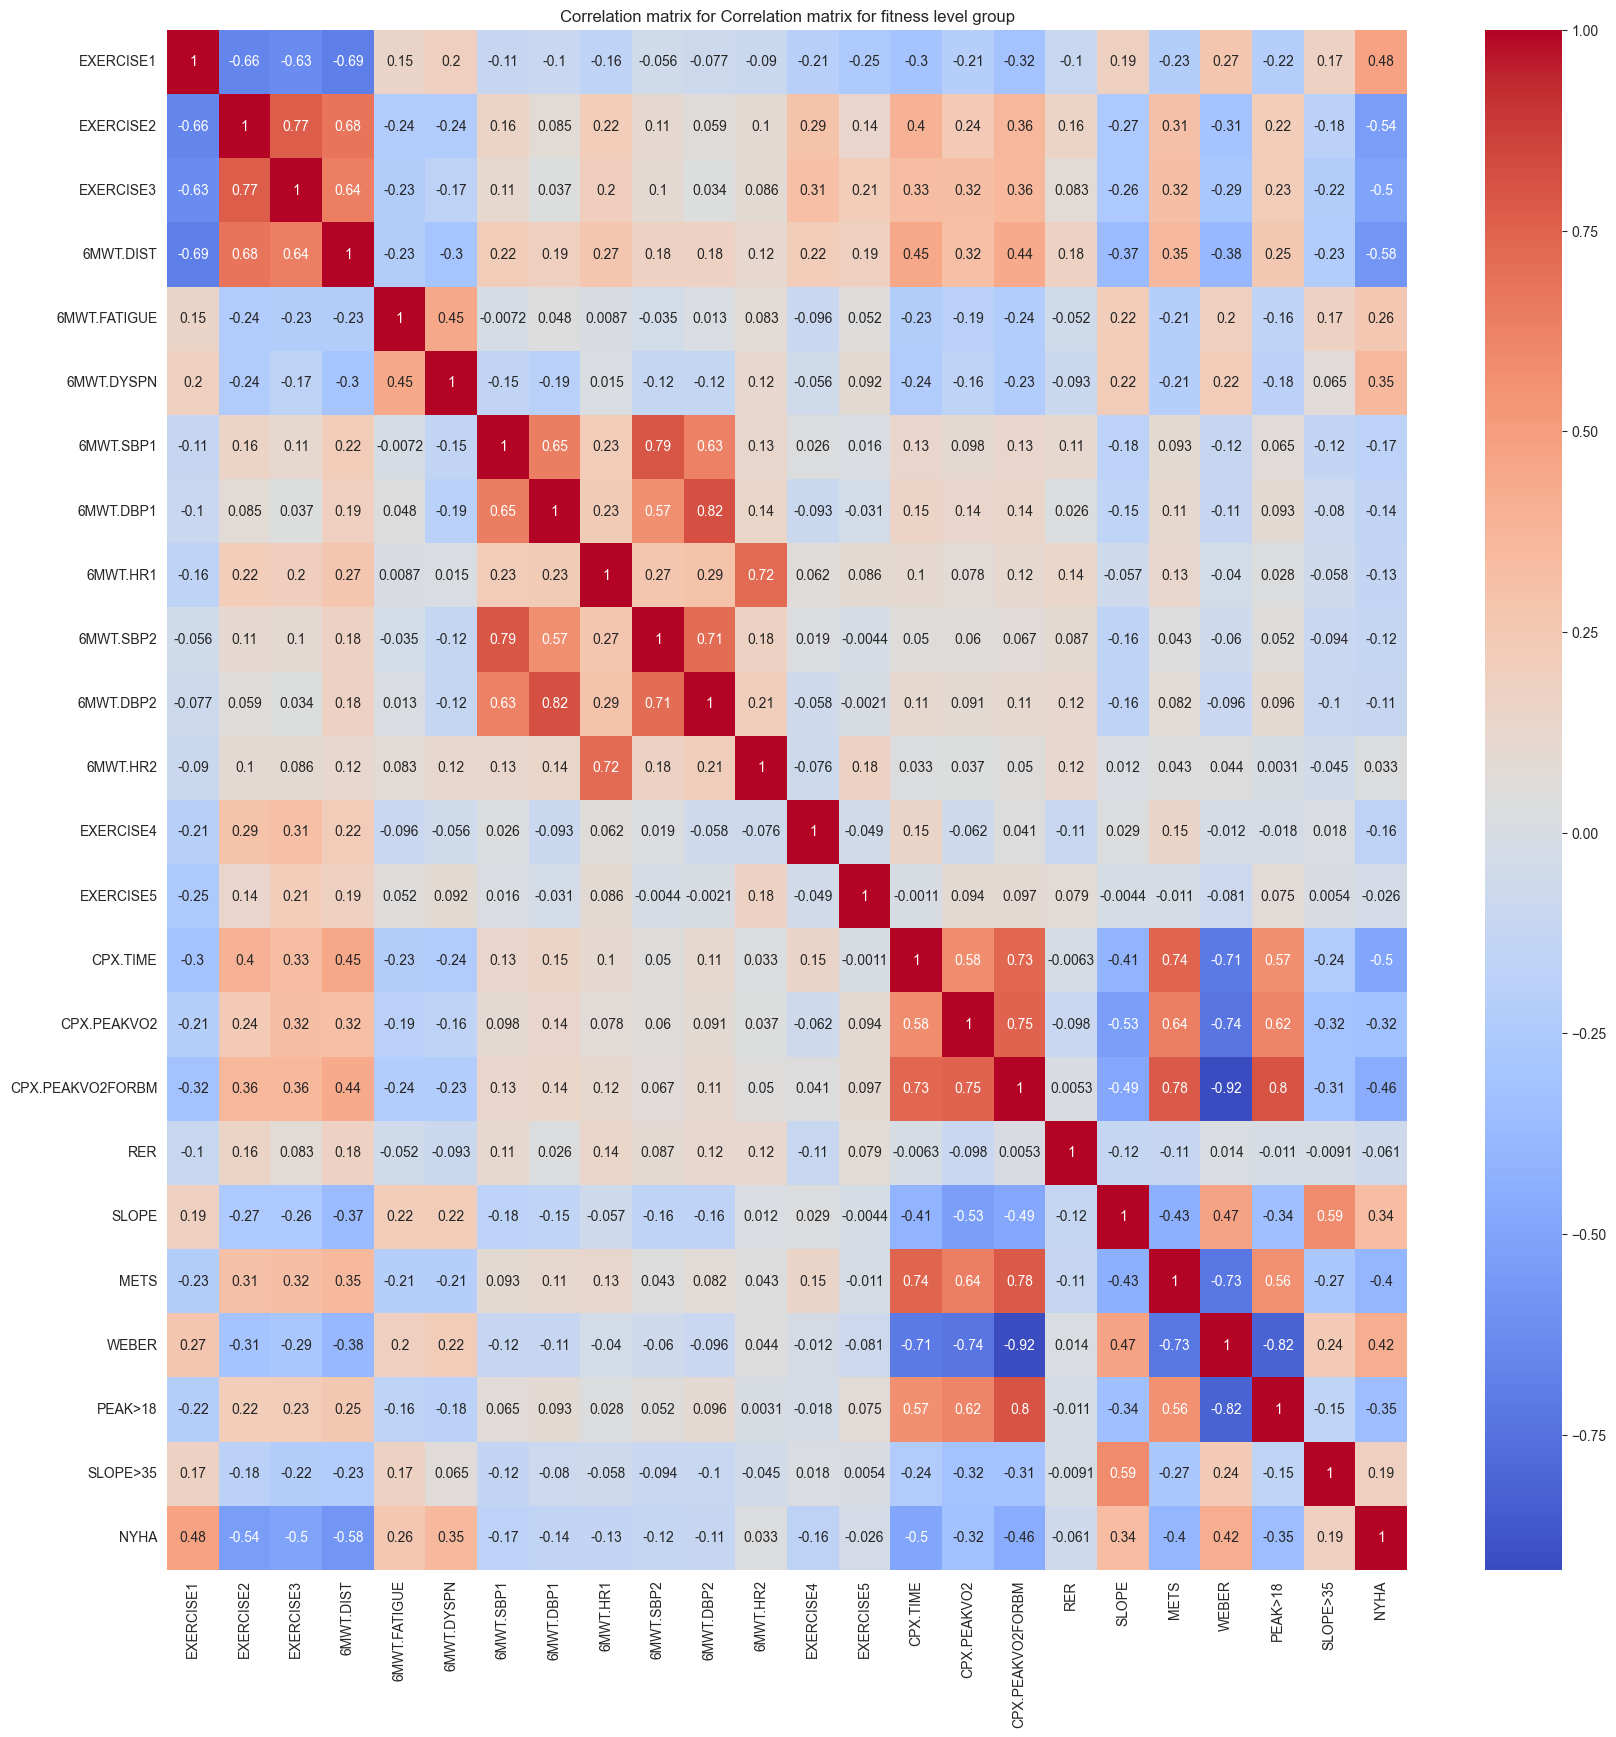

                  correlation  missing_values  importance
6MWT.DIST            0.578489               0    0.178229
EXERCISE2            0.540955               0    0.023540
EXERCISE3            0.499594               0    0.026207
CPX.TIME             0.496047               0    0.097742
EXERCISE1            0.479145               0    0.112860
CPX.PEAKVO2FORBM     0.458182               0    0.065021
WEBER                0.416617               0    0.000000
METS                 0.401358               0    0.055470
PEAK>18              0.353975               0    0.000000
6MWT.DYSPN           0.351833               0    0.021713
SLOPE                0.335028               0    0.062367
CPX.PEAKVO2          0.320630               0    0.055848
6MWT.FATIGUE         0.260995               0    0.022891
SLOPE>35             0.193844               0    0.000000
6MWT.SBP1            0.170201               0    0.013553
EXERCISE4            0.163381               0    0.016862
6MWT.DBP1     

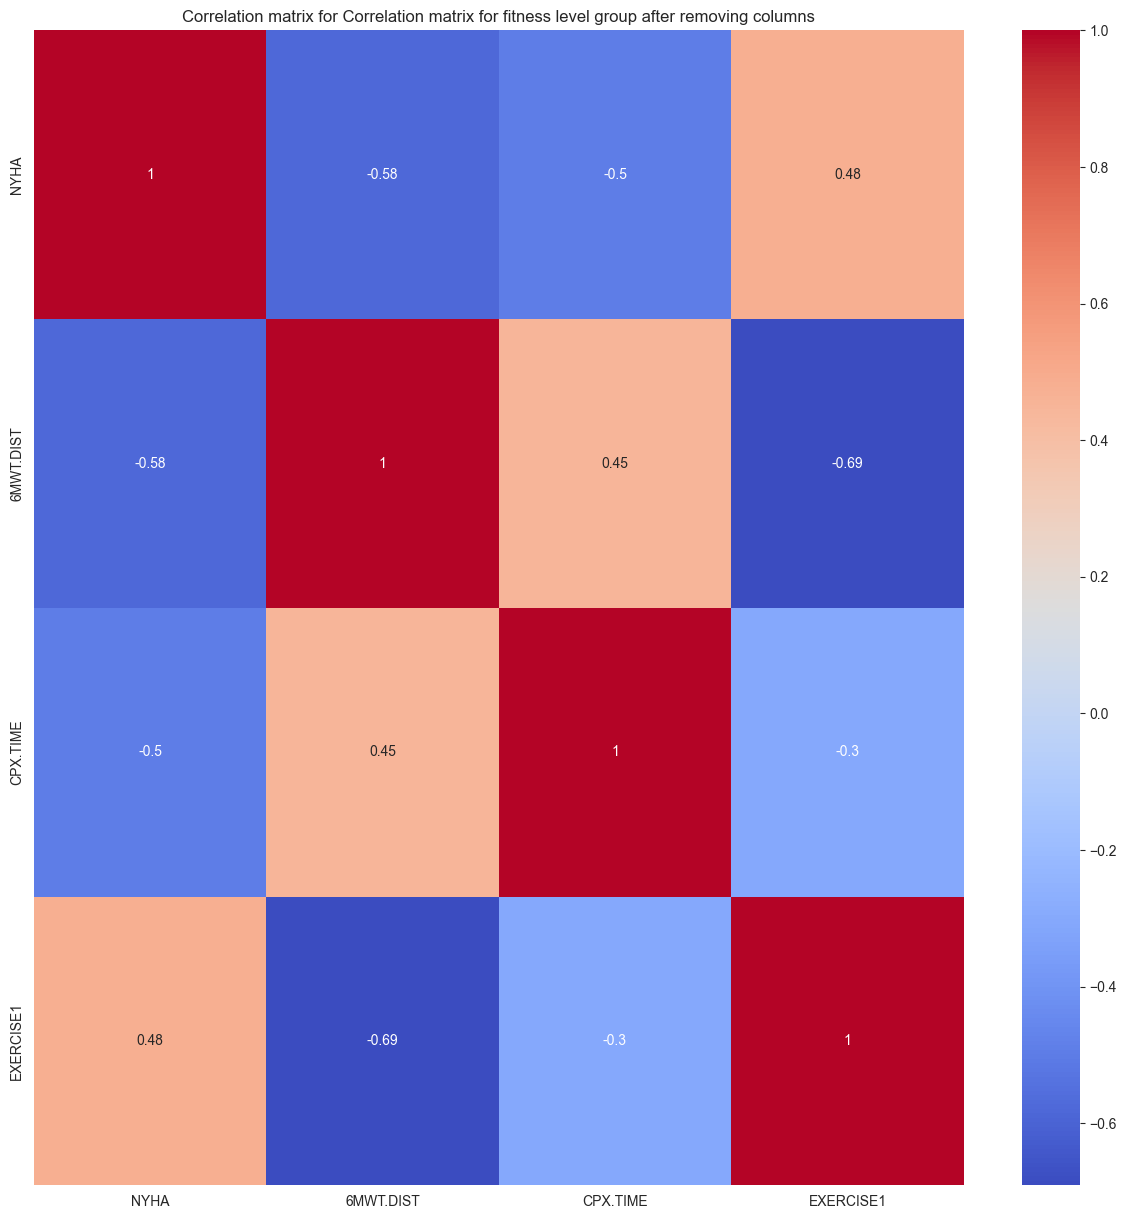

Cross validation score before grid search: 0.5258985200845666
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: 0.6269027484143763
Cross validation score after grid search: 0.6267441860465117
Mean cross validation score after optimize: 0.6267441860465117
Growth of cross validation score: 0.10084566596194511
     feature  importance
0  6MWT.DIST    0.519437
1   CPX.TIME    0.377920
2  EXERCISE1    0.102643


In [140]:
# Correlation matrix
plot_corr_matrix(fitness_level_group, 'Correlation matrix for fitness level group', (20, 20))

# Check correlation with NYHA
group_checking = prepare_group_checking(fitness_level_group)

# Prepare data for Decision Tree Classifier
X = fitness_level_group.drop(columns=['NYHA'])
y = fitness_level_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

group_checking = add_importance_to_group_checking(group_checking, model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.15
columns_to_remove = group_checking[group_checking['correlation'] < 0.35].index
fitness_level_group = fitness_level_group.drop(columns=columns_to_remove)

# Use only NYHA, 6MWT.DIST, CPX.TIME, EXERCISE1 columns
fitness_level_group = fitness_level_group[['NYHA', '6MWT.DIST', 'CPX.TIME', 'EXERCISE1']]

plot_corr_matrix(fitness_level_group, 'Correlation matrix for fitness level group after removing columns', (15, 15))

X = fitness_level_group.drop(columns=['NYHA'])
y = fitness_level_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
fitness_level_model = grid_search.best_estimator_

test_with_cross_validation(fitness_level_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(fitness_level_model.feature_importances_, X)

# Conclusion from fitness level group:
From the above table we can see that the most important variables are:
- 6MWT.DIST - distance in 6 minute walk test (dystans w teście 6 minutowego marszu)
- CPX.TIME - time of exercise on a treadmill (czas ćwiczeń na bieżni)
- EXERCISE1 - number of seconds needed to complete the task, higher number = worse)  (liczba sekund potrzebnych do wykonania zadania, im wyższa liczba tym gorzej)

# 2. Training and improving the model

## Some approach to create the model.

1) Create the model per each group of variables and then use this models together to create the ensemble model.
2) Create the model using only variables that are correlated with target variable which are representative for the model.

All of this approaches will be tested and compared to each other.

# Help functions

In [173]:

from sklearn.tree import plot_tree
from sklearn.tree import _tree
from sklearn.metrics import confusion_matrix

# https://mljar.com/blog/extract-rules-decision-tree/
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " AND "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: " + str(np.round(path[-1][0][0][0], 3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"(class={class_names[l]}) (accuracy: {np.round(100.0 * classes[l] / np.sum(classes), 2)}%)"
        rule += f" | based on {path[-1][1]:,} samples, support: {path[-1][1]/len(X):.1%}"
        rules += [rule]

    return rules


def plot_decision_tree(model, X, figsize=(20, 10), dpi=1000, filename=None):
    plt.figure(figsize=figsize, dpi=dpi)

    filename = filename if filename else f"max_depth_{model.max_depth}_min_samples_split_{model.min_samples_split}_min_samples_leaf_{model.min_samples_leaf}"
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True,
              class_names=["NYHA I", "NYHA II", "NYHA III", "NYHA IV"]);
    plt.title(f"Decision tree for {filename}")
    plt.savefig(f"plots/{filename}.png", dpi=dpi)


def plot_confusion_matrix(model, X, y, figsize=(10, 6), dpi=1000, filename=None):
    preds = model.predict(X)
    plt.figure(figsize=figsize, dpi=dpi)
    sns.heatmap(confusion_matrix(y, preds), annot=True, cmap="viridis", fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion matrix")
    filename = filename if filename else f"max_depth_{model.max_depth}_min_samples_split_{model.min_samples_split}_min_samples_leaf_{model.min_samples_leaf}"
    plt.savefig(f"plots/confusion_matrix_{filename}.png", dpi=dpi)


def save_rules_to_file(filename, rules: str):
    # create a directory for rules
    if not os.path.exists("rules"):
        os.makedirs("rules")

    # save rules to file
    with open(f"rules/{filename}.txt", "w") as f:
        f.write(rules)


def plot_confusion_matrix_for_predictions(y_true, y_pred, figsize=(20, 10), dpi=1000, filename=None):
    plt.figure(figsize=figsize, dpi=dpi)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="viridis", fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion matrix")
    filename = filename if filename else f"max_depth_{model.max_depth}_min_samples_split_{model.min_samples_split}_min_samples_leaf_{model.min_samples_leaf}"
    plt.savefig(f"plots/confusion_matrix_{filename}.png", dpi=dpi)
    print(cm)

## 2.1. Prepare data

In [142]:


# Create new dataframe with chosen variables
df = pd.DataFrame()
df['NYHA'] = NYHA

columns_to_add = clinical_group.columns
for column in columns_to_add:
    df[column] = clinical_group[column]

df['AGE'] = demographic_group['AGE']
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

columns_to_add = comorbidities_group.columns
for column in columns_to_add:
    df[column] = comorbidities_group[column]

columns_to_add = treatment_group.columns
for column in columns_to_add:
    df[column] = treatment_group[column]

columns_to_add = biochemistry_group.columns
for column in columns_to_add:
    df[column] = biochemistry_group[column]


columns_to_add = fitness_level_group.columns
for column in columns_to_add:
    df[column] = fitness_level_group[column]

print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"Columns:\n {df.columns}")
# Print uniques values for each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")




Number of rows: 434
Number of columns: 16
Columns:
 Index(['NYHA', 'DEATH?', 'QOL', 'MR', 'AGE', 'AF', 'DM', 'KIDNEY.DIS', 'DIUR',
       'DIGOX', 'HB', 'K', 'BNP', '6MWT.DIST', 'CPX.TIME', 'EXERCISE1'],
      dtype='object')
NYHA: [2. 1. 3. 4.]
DEATH?: [0. 1.]
QOL: [27. 42.  0. 10.  4. 50. 30. 23.  6. 38.  5. 63. 60. 68. 24. 15. 19. 55.
 45. 44. 13. 18. 28. 76. 46. 56. 31. 54. 52. 73. 32. 65.  8. 17. 70. 29.
 64. 62. 77. 91. 49. 61. 66.  2. 98. 86. 69. 34. 25. 37. 12. 14.  9. 58.
 22. 11. 16. 40. 36. 51. 74. 67. 48. 26. 47. 21. 81. 35. 78. 79. 57. 87.
 95. 43. 53. 41.  1.  3. 33.]
MR: [0.5 1.  2.  0.  3.  2.5 3.5 1.5 4. ]
AGE: [47 60 61 24 41 46 50 54 59 42 43 48 49 51 52 58 63 64 65 66 75 32 53 55
 56 57 62 67 69 70 72 74 76 73 37 71 68 79 44 82 80 77 40 36 45 78 81 83
 84 33 38 91 34]
AF: [0. 1.]
DM: [1. 0.]
KIDNEY.DIS: [0. 1.]
DIUR: [1. 0.]
DIGOX: [0. 1.]
HB: [17.8 14.5 15.1 14.6 13.7 15.7 15.6 14.7 16.7 12.3 15.5 16.1 13.1 12.8
 15.2 13.8 15.3 17.6 14.1 17.  12.7 10.7 11.1 13.4 13

## 2.2. Create ensemble model from all groups (voting model and random forest)

In [192]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove all date columns
X = df.drop(columns=['NYHA'])
y = df['NYHA']

# Create voting model
estimators = [('treatment', treatment_model), ('biochemistry', biochemistry_model), ('clinical', clinical_model),
              ('comorbidities_model', comorbidities_model), ('fitness_level', fitness_level_model)]
voting_model = VotingClassifier(
    estimators=estimators,
    voting='soft',
    # flatten_transform=False,
)
voting_model.fit(X, y)

# Create random forest model
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    # min_samples_split=2,
    # min_samples_leaf=1,
)
random_forest_model.fit(X, y)

RandomForestClassifier(max_depth=10)

In [ ]:
from datetime import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
X = df.drop(columns=['NYHA'])
y = df['NYHA']

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []
test_number = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    preds = voting_model.predict(X_test)
    print(f"{test_number}: {accuracy_score(y_test, preds)}")
    test_number += 1
    results.append(accuracy_score(y_test, preds))

preds = voting_model.predict(X)
print(f"Accuracy for voting model: {np.mean(results) * 100.0}%")
plot_confusion_matrix_for_predictions(y, preds, filename=f"voting_model_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}")
print(classification_report(y, preds))

1: 1.0
2: 1.0
3: 0.9772727272727273
4: 1.0
5: 1.0
6: 1.0
7: 1.0
8: 1.0
9: 0.9767441860465116
10: 1.0
Accuracy for voting model: 99.5401691331924%


In [190]:
import numpy as np

# Załóżmy, że voting_clf to Twój wytrenowany VotingClassifier
feature_importances = []

for name, estimator in voting_model.named_estimators_.items():
    if hasattr(estimator, 'feature_importances_'):
        feature_importances.append(estimator.feature_importances_)

# Uśrednianie ważności cech z różnych estymatorów
avg_feature_importances = np.mean(feature_importances, axis=0)
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': avg_feature_importances})
print(feature_importances_df.sort_values('importance', ascending=False))

       feature  importance
12   6MWT.DIST    0.469182
13    CPX.TIME    0.271016
14   EXERCISE1    0.074665
11         BNP    0.055366
10           K    0.033218
3          AGE    0.023427
9           HB    0.021363
2           MR    0.012500
1          QOL    0.010544
0       DEATH?    0.008536
8        DIGOX    0.008433
7         DIUR    0.004673
6   KIDNEY.DIS    0.003629
5           DM    0.002711
4           AF    0.000739


## 2.2.1. Evaluate the model random forest

In [185]:
# Evaluate with cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.drop(columns=['NYHA'])
y = df['NYHA']

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []
test_number = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    preds = random_forest_model.predict(X_test)
    print(f"{test_number}: {accuracy_score(y_test, preds)}")
    test_number += 1
    results.append(accuracy_score(y_test, preds))

preds = random_forest_model.predict(X)
plot_confusion_matrix_for_predictions(y, preds, filename=f"random_forest_model_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}")
print(f"Accuracy for random forest: {np.mean(results) * 100.0}%")
print(classification_report(y, preds))
print(f"Feature importances: {random_forest_model.feature_importances_}")
print(f"Feature names: {X.columns}")
feature_importances = pd.DataFrame(random_forest_model.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

1: 1.0
2: 1.0
3: 0.9318181818181818
4: 0.9545454545454546
5: 0.9302325581395349
6: 0.9767441860465116
7: 1.0
8: 0.9534883720930233
9: 0.9302325581395349
10: 1.0
[[ 73   4   0   0]
 [  0 222   0   0]
 [  0  10 115   0]
 [  0   0   0  10]]
Accuracy for random forest: 96.77061310782241%
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        77
         2.0       0.94      1.00      0.97       222
         3.0       1.00      0.92      0.96       125
         4.0       1.00      1.00      1.00        10

    accuracy                           0.97       434
   macro avg       0.99      0.97      0.98       434
weighted avg       0.97      0.97      0.97       434

Feature importances: [0.01870025 0.09367783 0.03972395 0.08129543 0.01672764 0.0169113
 0.01273895 0.02047724 0.01625913 0.07502304 0.09096399 0.1029972
 0.15915552 0.1405044  0.11484414]
Feature names: Index(['DEATH?', 'QOL', 'MR', 'AGE', 'AF', 'DM', 'KIDNEY.DIS', 'DIUR', 'DIGOX

`## 2.3. Create the model using only variables that are correlated with target variable

In [166]:
from sklearn.tree import DecisionTreeClassifier

# Remove OQLsub1, AGE, KIDNEY.DIS, EXERCISE1, AF, DEATH?, MR, DM, DIUR, DIGOX from columns
# OQLsub1    0.000000
# 1         AGE    0.000000
# 2          AF    0.000000
# 3  KIDNEY.DIS    0.000000
# df = df.drop(['MR', 'DM', 'DIGOX', 'DIUR', 'KIDNEY.DIS', 'AF', 'AGE', 'OQLsub1'], axis=1)
# Create a decision tree classifier
X = df.drop(columns=["NYHA"])
y = df["NYHA"]

param_grid = {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
}
# ccp_alpha_0_class_weight_None_criterion_gini_max_depth_6_max_features_None_max_leaf_nodes_None_min_impurity_decrease_0.0_min_samples_leaf_4_min_samples_split_4_min_weight_fraction_leaf_0_random_state_0_splitter_best_

tree_model = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=5, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=4, min_weight_fraction_leaf=0.0, random_state=0,
    splitter='best')
tree_model.fit(X, y)
# model = DecisionTreeClassifier()

# Find the best parameters for the model
# grid_search, _ = create_grid_search(model, X, y, cv=10)
# tree_model = grid_search.best_estimator_

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_}")

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                       random_state=0)

## 2.3.1. Evaluate the model

In [180]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from datetime import datetime

# Evaluate with cross validation
X = df.drop(columns=['NYHA'])
y = df['NYHA']

kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = []
index = 0
test_number = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    preds = tree_model.predict(X_test)
    print(f"{test_number}: {accuracy_score(y_test, preds)}")
    test_number += 1
    results.append(accuracy_score(y_test, preds))

preds = tree_model.predict(X)
plot_confusion_matrix_for_predictions(y, preds, filename=f"tree_model_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}")
print(f"Accuracy for random forest: {np.mean(results) * 100.0}%")
print(classification_report(y, preds))
print(f"Feature importances: {tree_model.feature_importances_}")
print(f"Feature names: {X.columns}")
# Feature importances with names
feature_importances = pd.DataFrame(tree_model.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

params = tree_model.get_params()
params_str = ""
for key, value in params.items():
    params_str += f"{key}_{value}_"
print(params_str)
file_name = f"decision_tree_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
plot_decision_tree(tree_model, X, filename=file_name)

1: 0.6590909090909091
2: 0.6818181818181818
3: 0.6363636363636364
4: 0.75
5: 0.8372093023255814
6: 0.8837209302325582
7: 0.7441860465116279
8: 0.8604651162790697
9: 0.7209302325581395
10: 0.8604651162790697
[[ 57  18   2   0]
 [ 26 190   6   0]
 [  3  42  80   0]
 [  0   0   6   4]]
Accuracy for random forest: 76.34249471458773%
              precision    recall  f1-score   support

         1.0       0.66      0.74      0.70        77
         2.0       0.76      0.86      0.81       222
         3.0       0.85      0.64      0.73       125
         4.0       1.00      0.40      0.57        10

    accuracy                           0.76       434
   macro avg       0.82      0.66      0.70       434
weighted avg       0.77      0.76      0.76       434

Feature importances: [0.01311182 0.00274102 0.01040527 0.01532111 0.         0.
 0.         0.         0.02339006 0.03399922 0.03222496 0.1083183
 0.40240982 0.22227586 0.13580255]
Feature names: Index(['DEATH?', 'QOL', 'MR', 'AGE', '

# Decision rules

In [175]:
from sklearn.tree import export_text

r = export_text(tree_model, feature_names=list(X.columns))
print(r)

|--- 6MWT.DIST <= 402.50
|   |--- CPX.TIME <= 12.11
|   |   |--- DEATH? <= 0.50
|   |   |   |--- EXERCISE1 <= 7.65
|   |   |   |   |--- HB <= 14.15
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- HB >  14.15
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- EXERCISE1 >  7.65
|   |   |   |   |--- AGE <= 70.50
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- AGE >  70.50
|   |   |   |   |   |--- class: 3.0
|   |   |--- DEATH? >  0.50
|   |   |   |--- EXERCISE1 <= 9.35
|   |   |   |   |--- AGE <= 50.00
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- AGE >  50.00
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- EXERCISE1 >  9.35
|   |   |   |   |--- class: 3.0
|   |--- CPX.TIME >  12.11
|   |   |--- 6MWT.DIST <= 275.00
|   |   |   |--- DIGOX <= 0.50
|   |   |   |   |--- class: 3.0
|   |   |   |--- DIGOX >  0.50
|   |   |   |   |--- class: 4.0
|   |   |--- 6MWT.DIST >  275.00
|   |   |   |--- BNP <= 393.35
|   |   |   |   |--- class: 2.0
|   |   |   |--- BNP

In [176]:
from datetime import datetime
rules = get_rules(tree_model, list(X.columns), ['NYHA 1', 'NYHA 2', 'NYHA 3', 'NYHA 4'])
rules_txt = ""
for r in rules:
    rules_txt += r + "\n"

file_name = f"decision_tree_rules_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
save_rules_to_file(file_name, rules_txt)
print(rules_txt)

if (6MWT.DIST > 402.5) AND (CPX.TIME <= 12.858) AND (CPX.TIME > 7.858) AND (EXERCISE1 > 3.95) AND (K <= 1.525) then (class=NYHA 2) (accuracy: 79.07%) | based on 129 samples, support: 29.7%
if (6MWT.DIST > 402.5) AND (CPX.TIME > 12.858) AND (EXERCISE1 <= 4.81) AND (6MWT.DIST > 497.0) AND (MR > 0.75) then (class=NYHA 1) (accuracy: 61.9%) | based on 42 samples, support: 9.7%
if (6MWT.DIST > 402.5) AND (CPX.TIME > 12.858) AND (EXERCISE1 > 4.81) AND (BNP > 645.0) AND (6MWT.DIST > 451.0) then (class=NYHA 2) (accuracy: 63.16%) | based on 38 samples, support: 8.8%
if (6MWT.DIST <= 402.5) AND (CPX.TIME <= 12.11) AND (DEATH? > 0.5) AND (EXERCISE1 <= 9.35) AND (AGE > 50.0) then (class=NYHA 3) (accuracy: 94.29%) | based on 35 samples, support: 8.1%
if (6MWT.DIST > 402.5) AND (CPX.TIME <= 12.858) AND (CPX.TIME <= 7.858) AND (BNP <= 3502.5) AND (6MWT.DIST > 427.5) then (class=NYHA 2) (accuracy: 64.52%) | based on 31 samples, support: 7.1%
if (6MWT.DIST > 402.5) AND (CPX.TIME > 12.858) AND (EXERCISE1

In [150]:
# matrix for all data
preds = tree_model.predict(X)
plot_confusion_matrix_for_predictions(y, preds, filename=f"decision_tree_all_data")
print(classification_report(y, preds))
print(f"Accuracy for all data: {accuracy_score(y, preds) * 100.0}%")
print("Number of samples: ", len(y))

[[ 59  15   3   0]
 [ 28 181  13   0]
 [  3  30  92   0]
 [  0   0   6   4]]
              precision    recall  f1-score   support

         1.0       0.66      0.77      0.71        77
         2.0       0.80      0.82      0.81       222
         3.0       0.81      0.74      0.77       125
         4.0       1.00      0.40      0.57        10

    accuracy                           0.77       434
   macro avg       0.82      0.68      0.71       434
weighted avg       0.78      0.77      0.77       434

Accuracy for all data: 77.41935483870968%
Number of samples:  434
